In [344]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
from copy import deepcopy
from preprocessing import Preprocess
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from math import sqrt
import scipy.io
import warnings

warnings.filterwarnings("ignore")

In [345]:
#Rule Object structure
class rule_object():
    def __init__(self,complete_rules,prem_terms,rules,wd_,index):
        self.complete_rules = complete_rules
        self.prem_terms = prem_terms
        self.rules = rules
        self.index = index
        self.wd_ = wd_

In [346]:
#dataset = pd.read_csv('series/multivariate-time-series-data-master/exchange_rate/exchange_rate.txt',header=None)
mat = scipy.io.loadmat('cluster4.mat')
dataset = mat.get('cluster4')[:,1:4]

In [347]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Apr 21 19:12:18 2015',
 '__version__': '1.0',
 '__globals__': [],
 'cluster4': array([[ 2420.  ,  5750.5 ,  3450.3 ,  6830.2 ,  2980.  ],
        [ 5138.  ,  3881.6 ,  2328.96,  4108.8 ,  1714.  ],
        [ 4182.  ,  4350.4 ,  2610.24,  3131.6 ,  2282.  ],
        [ 6940.  ,  6623.4 ,  3974.04,  7008.  ,  5876.  ],
        [ 2262.  ,  3375.5 ,  2025.3 ,  1276.8 ,  2226.  ],
        [ 4050.  ,  6651.7 ,  3991.02,  6554.6 ,  3641.  ],
        [ 6430.  ,  4394.8 ,  2636.88,  4387.6 ,  3292.  ],
        [ 1986.  ,  4968.3 ,  2980.98,  4651.8 ,  4101.  ],
        [ 3214.  ,  6355.6 ,  3813.36,  6192.2 ,  2397.  ],
        [ 2304.  ,  4515.7 ,  2709.42,  4645.4 ,  3382.  ],
        [ 3868.  ,  4620.  ,  2772.  ,  4540.  ,  1983.  ],
        [ 4110.  ,  5804.4 ,  3482.64,  5115.2 ,  1977.  ],
        [ 3590.  ,  6254.4 ,  3752.64,  6776.2 ,  2492.  ],
        [ 5076.  ,  4788.6 ,  2873.16,  4455.  ,  2253.  ],
        [

In [348]:
dataset

array([[ 5750.5 ,  3450.3 ,  6830.2 ],
       [ 3881.6 ,  2328.96,  4108.8 ],
       [ 4350.4 ,  2610.24,  3131.6 ],
       [ 6623.4 ,  3974.04,  7008.  ],
       [ 3375.5 ,  2025.3 ,  1276.8 ],
       [ 6651.7 ,  3991.02,  6554.6 ],
       [ 4394.8 ,  2636.88,  4387.6 ],
       [ 4968.3 ,  2980.98,  4651.8 ],
       [ 6355.6 ,  3813.36,  6192.2 ],
       [ 4515.7 ,  2709.42,  4645.4 ],
       [ 4620.  ,  2772.  ,  4540.  ],
       [ 5804.4 ,  3482.64,  5115.2 ],
       [ 6254.4 ,  3752.64,  6776.2 ],
       [ 4788.6 ,  2873.16,  4455.  ],
       [ 4446.4 ,  2667.84,  2579.  ],
       [ 8018.  ,  4810.8 ,  7855.2 ],
       [ 3745.9 ,  2247.54,   866.6 ],
       [ 6928.2 ,  4156.92,  6406.4 ],
       [ 5201.7 ,  3121.02,  4479.6 ],
       [ 5520.9 ,  3312.54,  5164.  ],
       [ 6801.9 ,  4081.14,  6308.2 ],
       [ 5225.1 ,  3135.06,  5124.8 ],
       [ 5149.4 ,  3089.64,  4958.4 ],
       [ 6240.4 ,  3744.24,  5410.8 ],
       [ 7045.4 ,  4227.24,  7570.4 ],
       [ 5402.1 ,  3241.2

In [349]:
'''
MA = 5
MA_values = np.zeros((dataset.shape[0]-MA,dataset.shape[1]))
for i in range(dataset.shape[1]):
    a = dataset[i].rolling(window=MA).mean().values
    MA_values[:,i] = a[5:]
MA_dataset = pd.DataFrame(MA_values)
'''

'\nMA = 5\nMA_values = np.zeros((dataset.shape[0]-MA,dataset.shape[1]))\nfor i in range(dataset.shape[1]):\n    a = dataset[i].rolling(window=MA).mean().values\n    MA_values[:,i] = a[5:]\nMA_dataset = pd.DataFrame(MA_values)\n'

In [350]:
#Basic informations 

num_predictors = 60
num_input = 12
lag = 24
lag_notused = np.array([[4,5],[4,5],[4],[4,5]])
not_used_lag = False

#Actually, lag stands for all inputs for each serie. Example, lag = 2 uses s(t) and s(t-1) to predict s(t+1)
diff_series = False
detrend_series = False

In [351]:
#We are going to split between training, validation and test set.
#Training set: 2 months of data (168*60) + lag
#Validation set: 168 steps (1 week)
#Test set: 168 steps (1 week)

h_test = 18
h_val = 18
#h_train = dataset.shape[0] - h_val - h_test - lag - 2
h_train = dataset.shape[0] - h_test - h_val

a = dataset.shape[0] #quantidade de dados
all_data = dataset[lag:,:] 
training_data = dataset[lag:lag+h_train,:]
test_data = dataset[a - h_test:a,:]

In [352]:
h_test

18

In [353]:
dataset.shape[0]

134

In [354]:
all_data.shape

(110, 3)

In [355]:
test_data.shape

(18, 3)

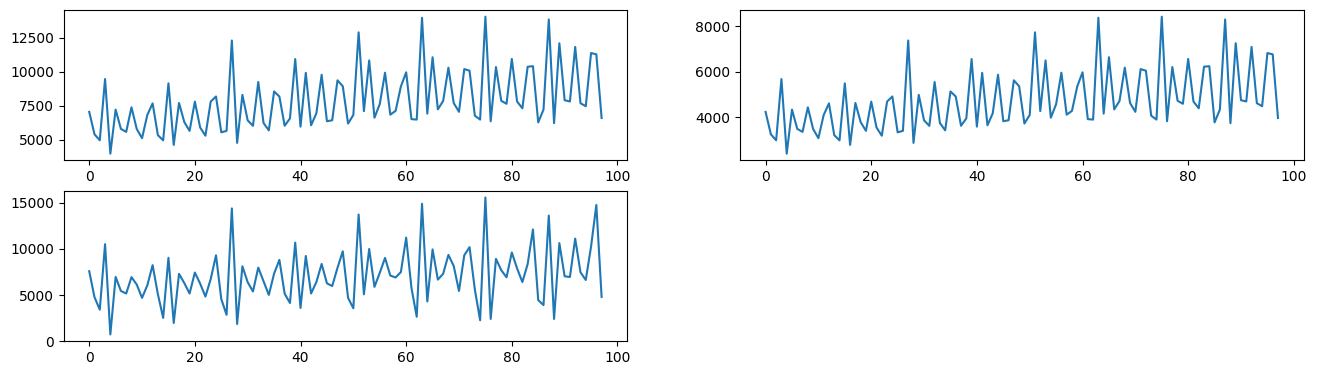

In [356]:
plt.figure(figsize=(16,9))
for n in range(training_data.shape[1]):
    plt.subplot(4,2,n+1)
    plt.plot(training_data[:,n])

In [357]:
#data = data1[:,[0, 61, 147, 241]]
#data_ = training_values[:,[0,6]]
#data_ = training_values[:,[0,2,6,7]]
data_ = training_data
#data_ = training_values[:,[0, 61, 147, 241]]

In [358]:
#bin_values = 12; #Representação da binarização do tempo.
num_series = data_.shape[1]  #Numero de series do problema, extraído dos dados

max_rulesize = 5 #Max numbers of premises rules.
min_activation = 0.55 #Minimum activation

form_method = 'nmean'
split_method = 'FCD'
solve_method = 'mqr'
#####Definicao de funcoes######
#detrend_method = ''
#bin_method = ''

fuzzy_method = 'mfdef_cluster'
num_groups = 5

defuzz_method = 'height'

ensemble_rules = None

total_number = data_.shape[1]*lag


filepath = 'results V2'

In [359]:
data_.shape

(98, 3)

In [360]:
# data_: dados de treino (removendo lag inicial)
#Normalize data 
scaler = StandardScaler()
#scaler = MinMaxScaler()
preprocess_data = Preprocess(data_,h_prev=h_val,num_series=num_series, lag=lag, target_position=1)

#For training set
#training_set_orig, val_set_orig = preprocess_data.diff_series()
training_set, val_set = preprocess_data.split_data()
correlation_array = preprocess_data.spearman_corr_weights()
autocorrelation_matrix = preprocess_data.linear_acf_weights()
#training_set_orig, val_set_orig, trends = preprocess_data.detrend_series()

#diff_data = np.concatenate((training_set_orig, val_set_orig))

#norm_data = scaler.fit_transform(diff_data)
#training_set = scaler.transform(training_set_orig)
#val_set = scaler.transform(val_set_orig)

#training_set[abs(training_set) > 3] = 0

yt, yp, yp_lagged = preprocess_data.delay_input(in_sample = training_set, lag = lag)
#For all set. This will be useful for initial values of prediction
all_yt, all_yp, all_lagged = preprocess_data.delay_input(in_sample = dataset, lag = lag)

In [361]:
correlation_array

array([0.34391376, 0.34391376, 0.31217249])

In [362]:
# # all_data: dados de treino + teste (removendo o lag inicial)
# process_all = Preprocess(all_data, h_prev = h_test, num_series=num_series)
# train_val_org, test_set_orig, a_trends = process_all.detrend_series()
# detrend_data = np.concatenate((train_val_org, test_set_orig))

# #data leakage?
# norm_data = scaler.fit_transform(detrend_data)
# training_set = scaler.transform(train_val_org)
# #val_set = scaler.transform(val_set_orig)

# test_set_norm = scaler.transform(test_set_orig)
# #all_data_norm = scaler.transform(all_data)

# test_all_yt, test_all_yp, test_all_lagged = preprocess_data.delay_input(in_sample = norm_data, lag = lag)

In [363]:
#diff_data.shape
#diff_data = data_

In [364]:
#plt.plot(yt[:,2])
#plt.ylabel('Diff values')
#plt.xlabel('Timestamp (h)')

In [365]:
#plt.plot(norm_data[:,2])
#plt.ylabel('Diff values')
#plt.xlabel('Timestamp (h)')

In [366]:
#For all set. This will be useful for initial values of prediction
#all_yt, all_yp, all_lagged = preprocess_data.delay_input(in_sample = diff_data, lag = lag)

In [367]:
#plt.plot(yt[200:,1])

In [368]:
#assert val_set.shape[0] == h_val
#assert yp_lagged.shape[0] == h_train
#assert yt.shape[0] == h_train

In [369]:
#dataset.shape

In [370]:
import seaborn as sns
from copy import deepcopy
from utils import *

import itertools
import json
import os

#For e-autoMFIS, we import all of them.
from eautoMFIS_V2 import autoMFIS
import numpy as np
import scipy.io
from reweight import Reweight
from fuzzyfication import Fuzzification
from defuzzification import Defuzzification
import matplotlib.pyplot as plt
from predict import predict, predict_pattern



def convert_object_to_float(data,datanames):
    
    for name in datanames:
        dname = data[name].values.astype('str')
        dname = [new_value.replace(',','.') for new_value in dname]
        data[name] = dname
        data[name] = data[name].astype(float)
    return data

##Assertion for ensemble rules
#Somehow, when appending rules, ensemble_rules[:,1] has a erroneous form. This part seems to normalize it.

#This module correct this error. Also, we are going to use some assertion to check if rules contains the same antecedents.
def correct_bug(ensemble_rules,max_rulesize=0):
    correct_rule = []
    d_stacked_rules = []
    new_ensemble_rules = np.zeros(shape=ensemble_rules.shape, dtype=object)


    for  n_times in range(ensemble_rules.shape[1]):
        t_rules = ensemble_rules[:,n_times]
        correct_rule = []
        d_stacked_rules = []
        k = 0
        for rule in t_rules:
            #print(rule)
            #print(len(rule))
            #Check if there's a rule bigger than max_rulesize + 1 (#antecedents + #consequent)
            if len(rule) > max_rulesize + 1:
                #print(rule)
                for i in rule:
                    #k += 1
                    if isinstance(i,tuple):
                        #print(i)
                        correct_rule.append(i)
                    else:
                        if len(correct_rule) == 0:
                            #print(i)
                            pass
                            #d_stacked_rules.append(i)
                        else:
                            #print(correct_rule)
                            new_ensemble_rules[k,n_times] = correct_rule
                            k += 1
                            #d_stacked_rules.append(correct_rule)
                            correct_rule = []
                            #d_stacked_rules.append(i)
            else:
                new_ensemble_rules[k,n_times] = rule
                k += 1
                #d_stacked_rules.append(rule)
            
        #new_ensemble_rules[:,i] = np.array(d_stacked_rules)

    return new_ensemble_rules

def remove_duplicates(new_ensemble_rules,ensemble_prem_terms, ensemble_antecedents):
    t_rules = deepcopy(new_ensemble_rules[:,0])
    no_duplicated_ensemble = np.zeros(new_ensemble_rules.shape,dtype=object)
    no_duplicated_prem_terms = np.zeros(ensemble_prem_terms.shape)
    no_duplicated_antecedents = np.zeros(ensemble_antecedents.shape,dtype=object)
    new_t_rules = None

    k = 0
    j = 0
    for rule in t_rules:
        if new_t_rules is None:
            new_t_rules = [rule]
            no_duplicated_ensemble[k,:] = deepcopy(new_ensemble_rules[j,:])
            no_duplicated_prem_terms[k,:] = deepcopy(ensemble_prem_terms[j,:])
            no_duplicated_antecedents[k,:] = deepcopy(ensemble_antecedents[j,:])
            k += 1

        elif not check_duplicate_rules(rule,new_t_rules):
            new_t_rules.append(rule)
            no_duplicated_ensemble[k,:] = deepcopy(new_ensemble_rules[j,:])
            no_duplicated_prem_terms[k,:] = deepcopy(ensemble_prem_terms[j,:])
            no_duplicated_antecedents[k,:] = deepcopy(ensemble_antecedents[j,:])
            k += 1
        j += 1

    new_rules = deepcopy(no_duplicated_ensemble[:k,:])
    new_prem_terms = deepcopy(no_duplicated_prem_terms[:k,:])
    new_antecedents = deepcopy(no_duplicated_antecedents[:k,:])

    return new_rules, new_prem_terms, new_antecedents



In [371]:
#t = [a + n for n in range(0,data.shape[0]-168,168) for a in range(24)]
#t_lagged = [v - lag for v in t if (v-lag) > 0 and (v-lag) < yp.shape[0]]
#yp = deepcopy(yp[t_lagged,:])
#yt = deepcopy(yt[t_lagged,:])
#yp_lagged = deepcopy(yp_lagged[t_lagged,:])

#data = deepcopy(data[t[len(t)-len(t_lagged):],:])
#in_sample = data[:data.shape[0]-h_prev,:]
#out_sample = data[data.shape[0]-h_prev:,:]

#print(len(t_lagged))

In [372]:
##Fuzzificacao
def fuzzy_transform(fuzzy_method, num_series, training_set, num_groups, yp, yt, yp_lagged, lag):
    
    Fuzzyfy = Fuzzification(fuzzy_method)

    #Lembrete: 
    #axis 0 - Registros da série
    #axis 1 - Valor de pertinência ao conjunto Fuzzy
    #axis 2 - Numero de séries

    first_time = True
    for n in range(num_series):
        
        _, mf_params = Fuzzyfy.fuzzify(training_set[:,n],np.array([]),num_groups=num_groups)
        mX, _ = Fuzzyfy.fuzzify(yp[:,n],mf_params,num_groups=num_groups)
        mY, _ = Fuzzyfy.fuzzify(yt[:,n],mf_params,num_groups=num_groups)
        if first_time:
            mX_ = np.ndarray([mX.shape[0],mX.shape[1], num_series])
            mY_ = np.ndarray([mY.shape[0],mY.shape[1], num_series])
            mf_params_ = np.ndarray([mf_params.shape[0],num_series])
            first_time = False
        mX_[:,:,n] = mX
        mY_[:,:,n] = mY
        mf_params_[:,n] = mf_params.ravel()
        #print(mf_params)
        #print(mX.shape)


    mX_lagged_ = np.ndarray([mX_.shape[0],mX_.shape[1],yp_lagged.shape[1]])
    for i in range(num_series):
        mf_params = mf_params_[:,i]
        for j in range(lag):
            mX, _ = Fuzzyfy.fuzzify(yp_lagged[:,i*lag+j],mf_params,num_groups=num_groups)
            mX_lagged_[:,:,i*lag+j] = mX
            #print(i*lag+j)


    #mX_lagged_[:,:,not_select_subsample] = 0

    #print(mX_lagged_[:,:,not_select_subsample])
    ############## Formulacao
    if not_used_lag:
        new_mX, lags_used = remove_lags(mX_lagged_,lag_notused,num_series,lag)
    else:
        new_mX = mX_lagged_
    
    return Fuzzyfy, mX_, mY_, mf_params_, mX_lagged_



In [373]:
all_lagged[yp_lagged.shape[0],:].reshape(1,-1).shape

(1, 72)

In [374]:
all_lagged.shape

(109, 72)

Shape of in-sample is 80
Shape of lagged data is 55
Shape of validation set is 18
Predict on validation set - #0
0.23516946958058224
errors: [[2.42265380e+03 1.45363366e+03 3.94111307e+03]
 [1.97133673e+03 1.18281287e+03 3.01539490e+03]
 [2.38740184e-01 2.38742649e-01 5.02100110e-01]]
RRSE Errors = [1971.3367344  1182.81287449 3015.39490238]
RRSE Errors = [1971.3367344  1182.81287449 3015.39490238]
Predict on validation set - #1
0.14684601611272502
errors: [[1.13132540e+03 6.78761445e+02 2.23416573e+03]
 [8.69065187e+02 5.21448285e+02 1.68908321e+03]
 [1.11622963e-01 1.11619935e-01 2.64068236e-01]]
RRSE Errors = [ 869.06518663  521.44828523 1689.08321131]
RRSE Errors = [ 869.06518663  521.44828523 1689.08321131]
Predict on validation set - #2
0.24182783376888664
errors: [[2.16157332e+03 1.29700167e+03 4.06862659e+03]
 [1.73544409e+03 1.04124430e+03 2.98655564e+03]
 [1.95899343e-01 1.95891989e-01 4.76526727e-01]]
RRSE Errors = [1735.44409383 1041.24430267 2986.55563916]
RRSE Errors = [1

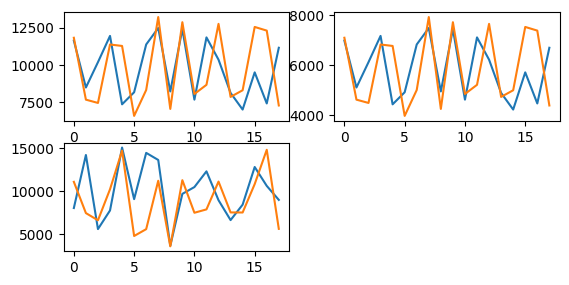

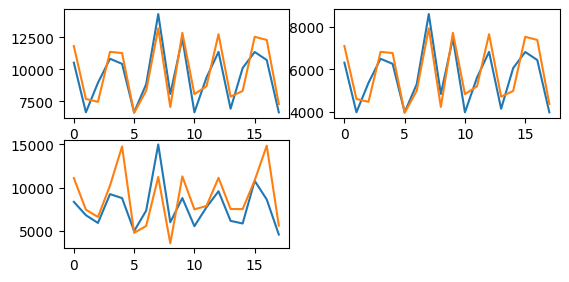

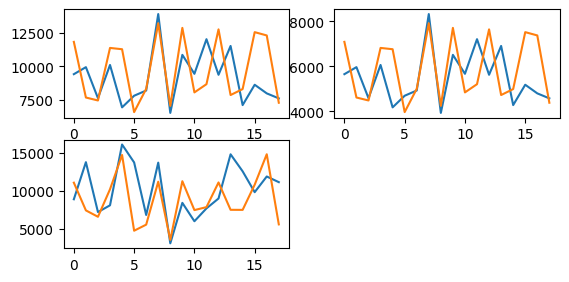

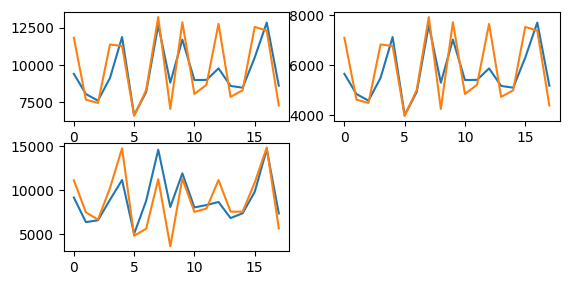

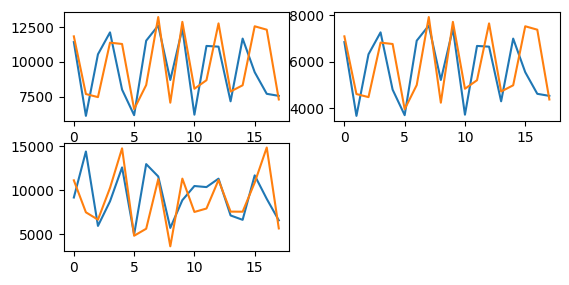

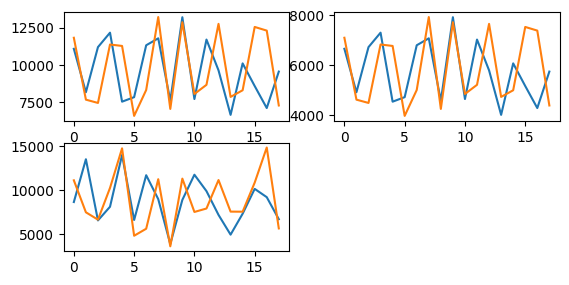

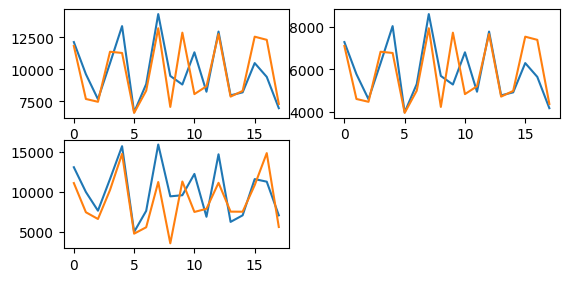

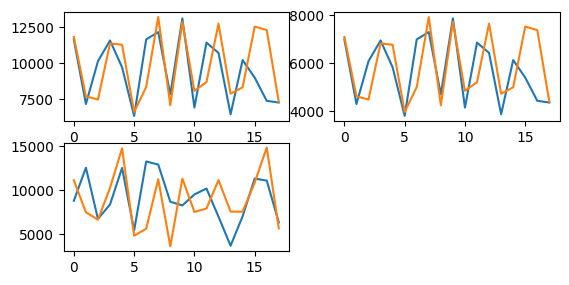

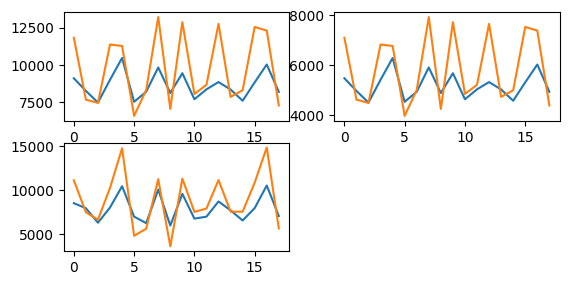

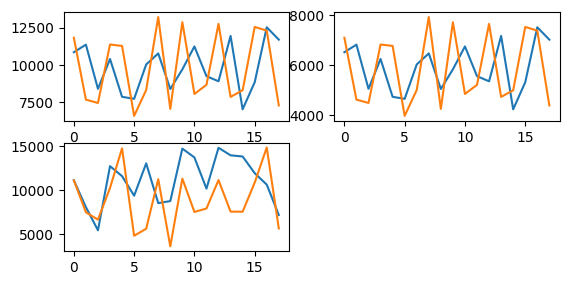

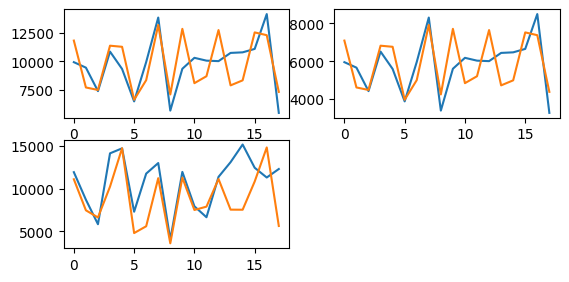

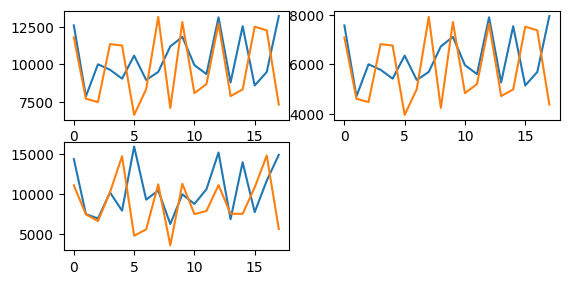

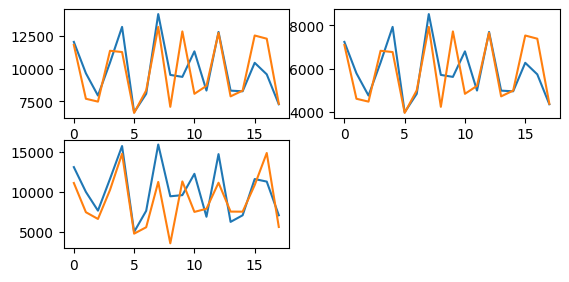

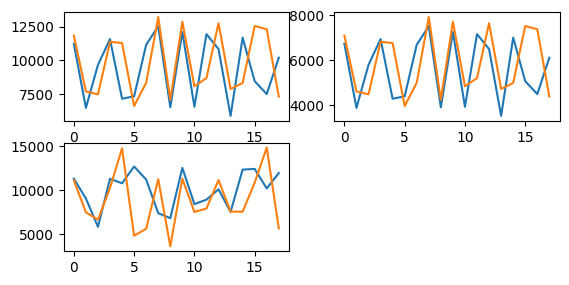

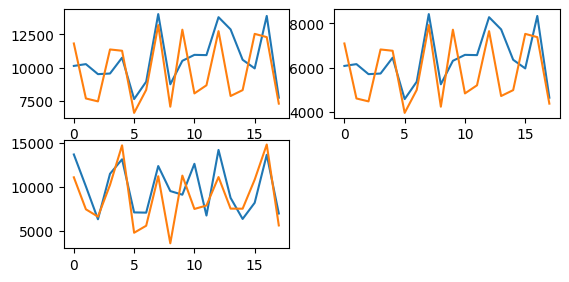

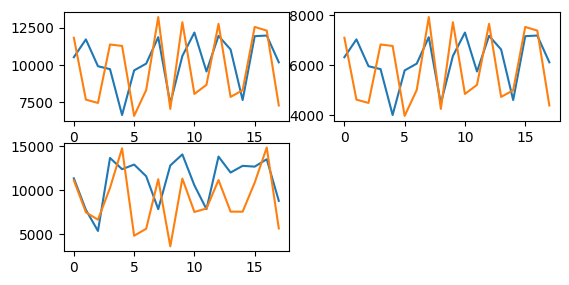

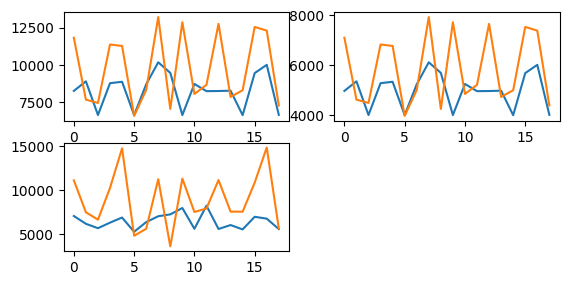

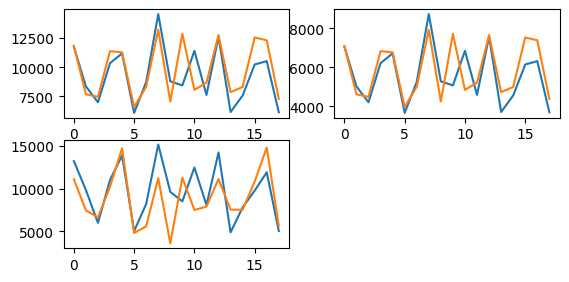

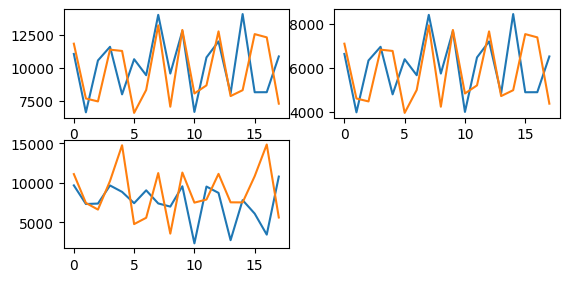

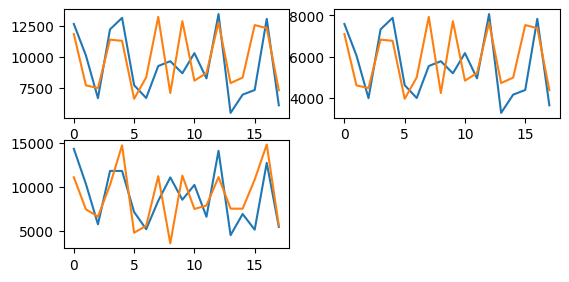

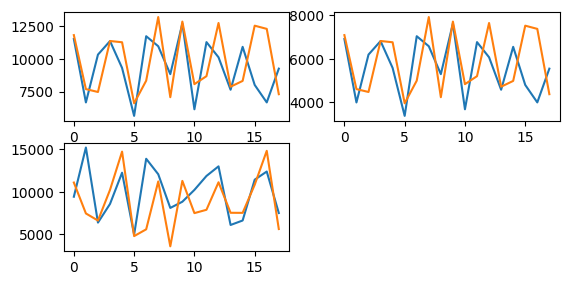

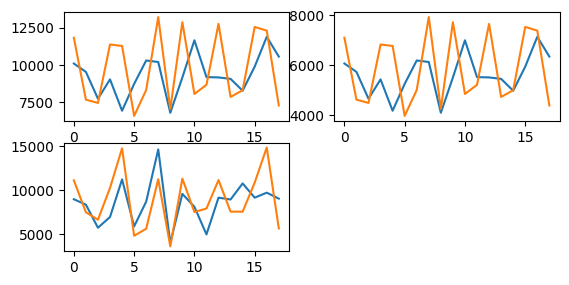

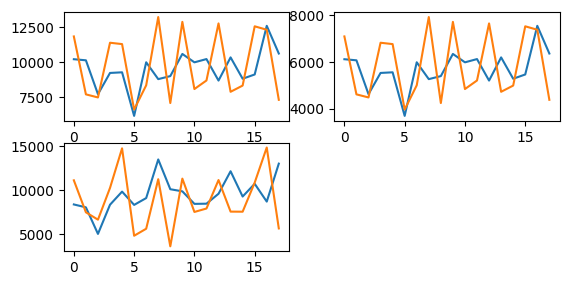

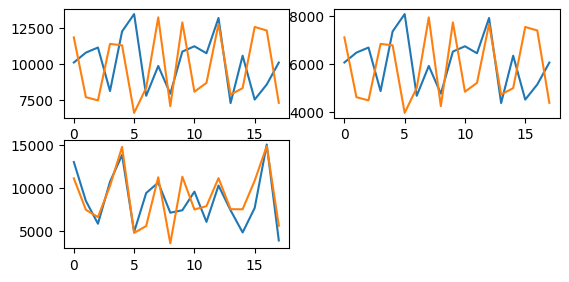

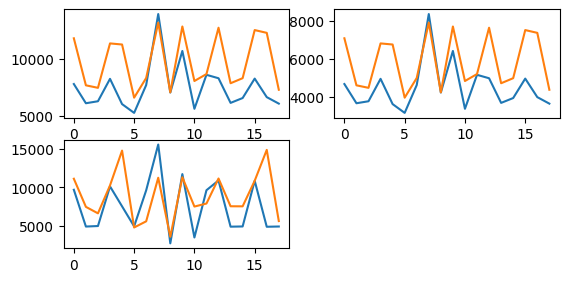

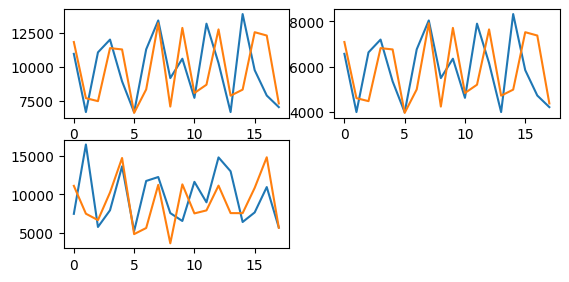

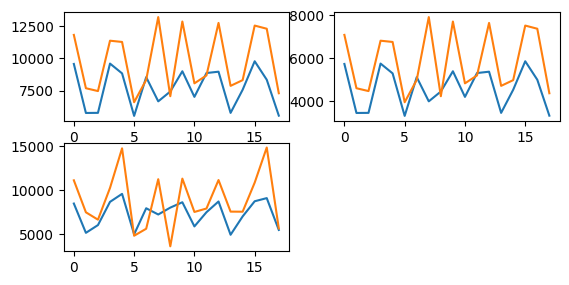

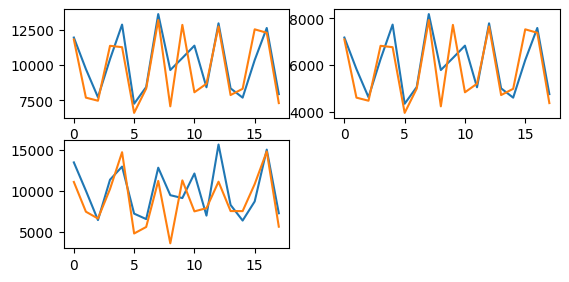

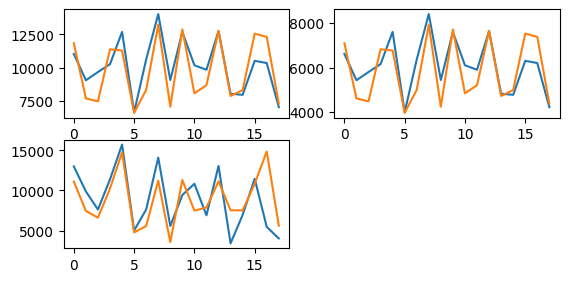

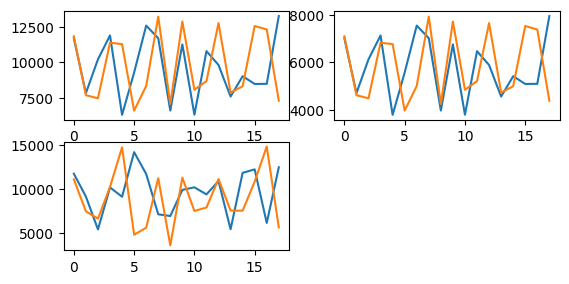

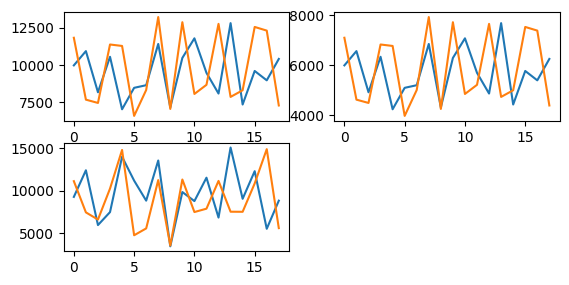

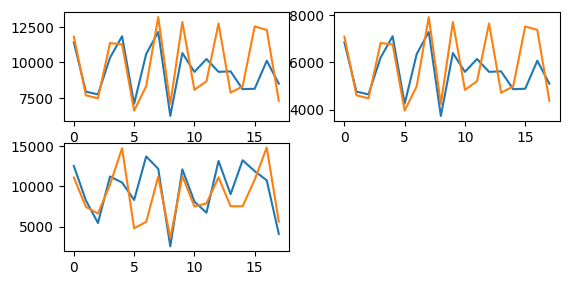

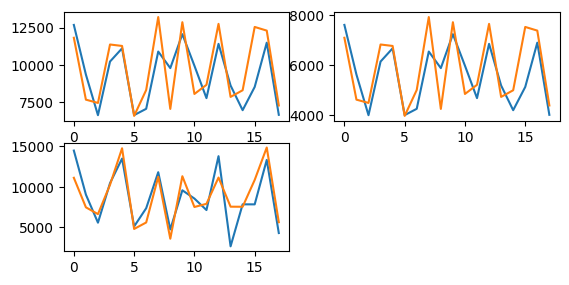

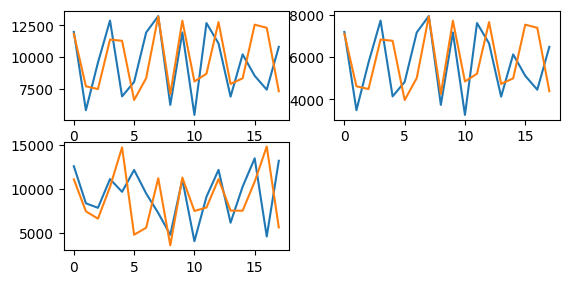

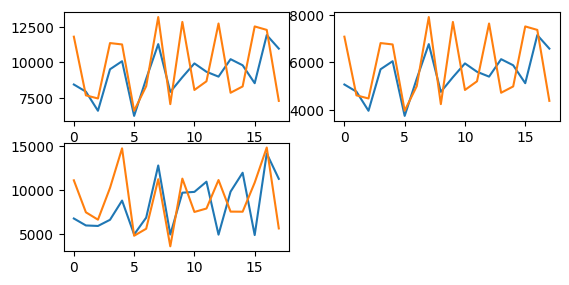

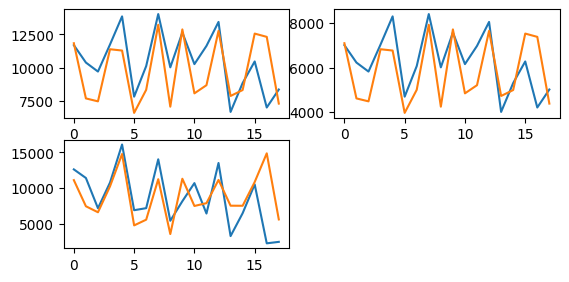

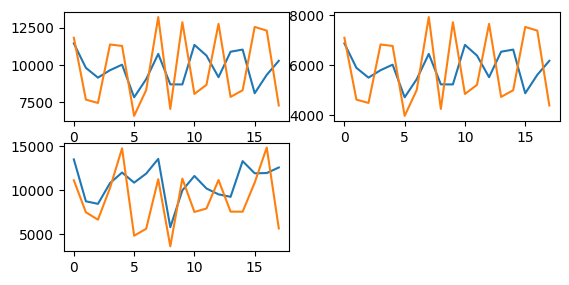

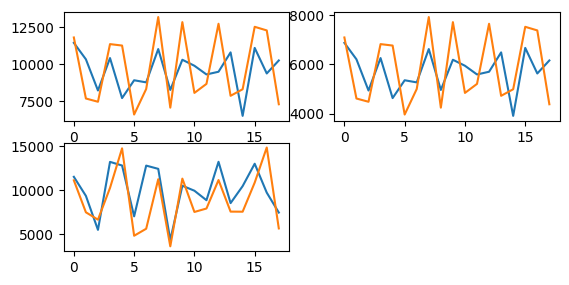

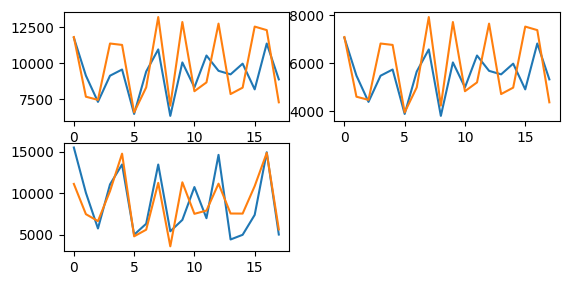

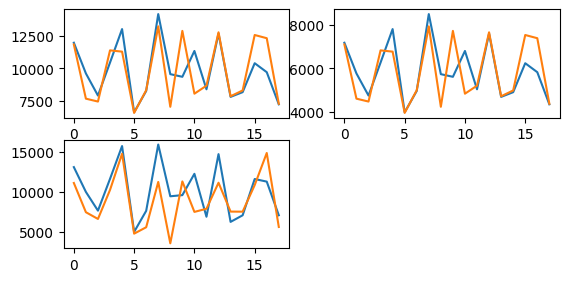

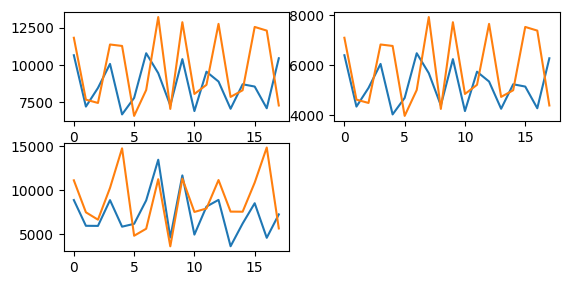

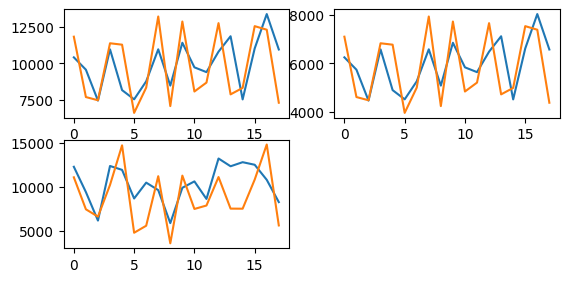

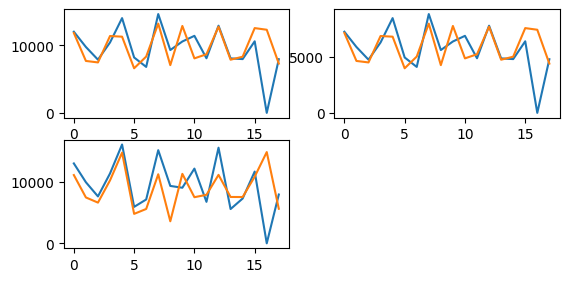

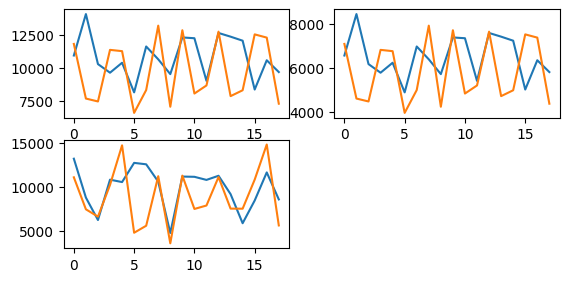

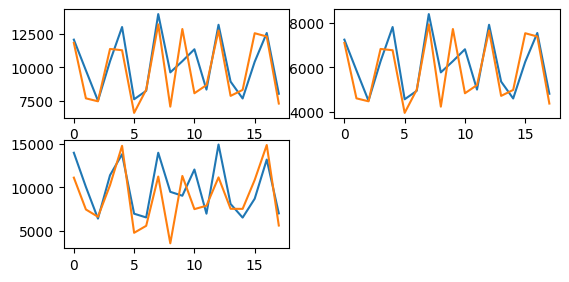

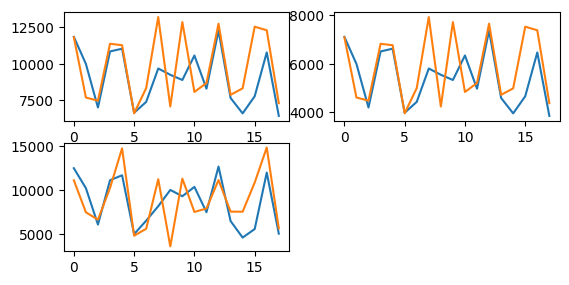

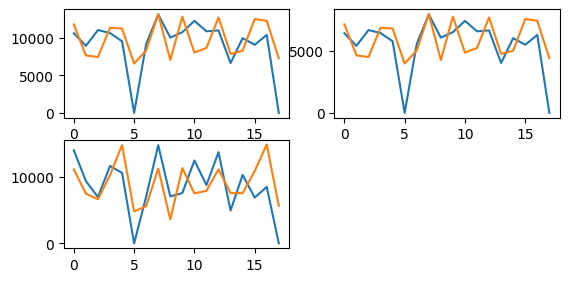

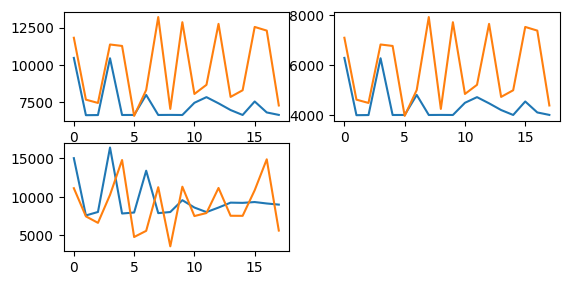

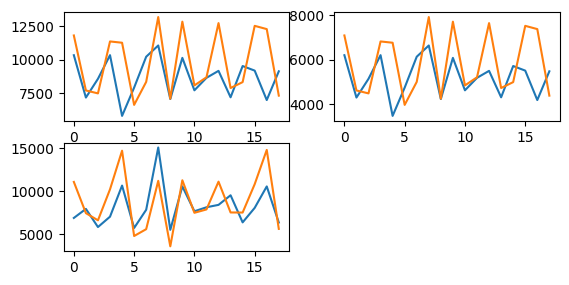

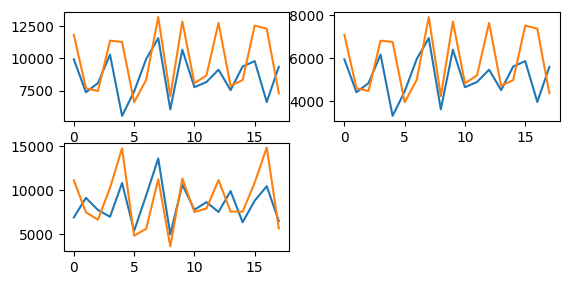

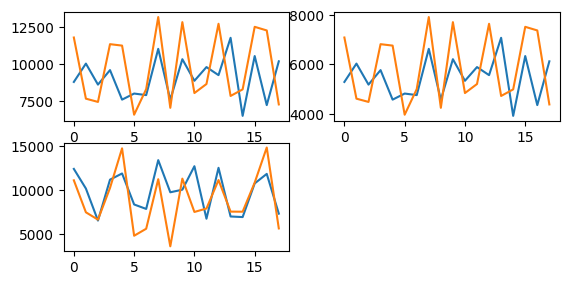

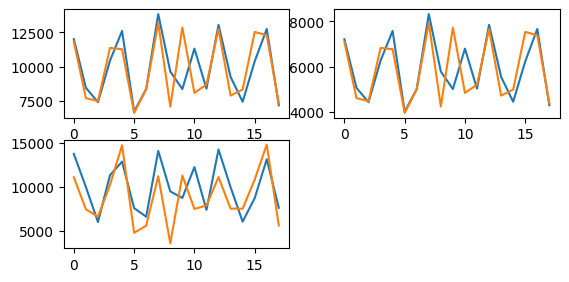

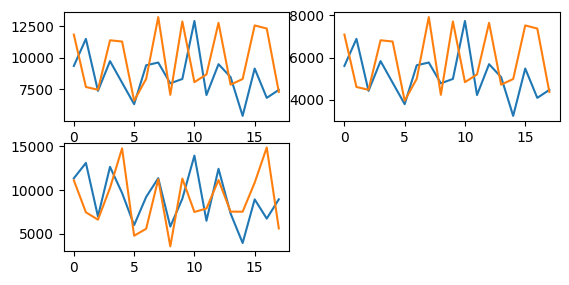

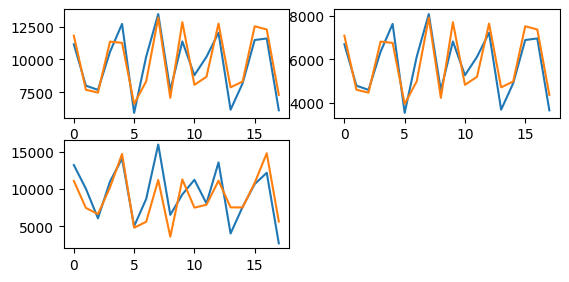

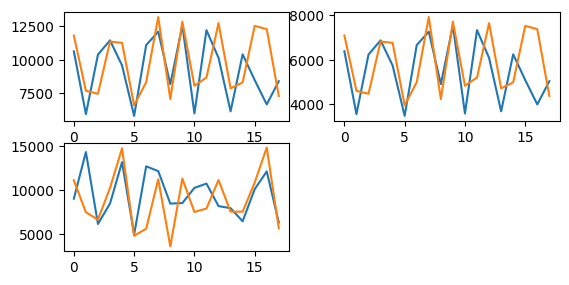

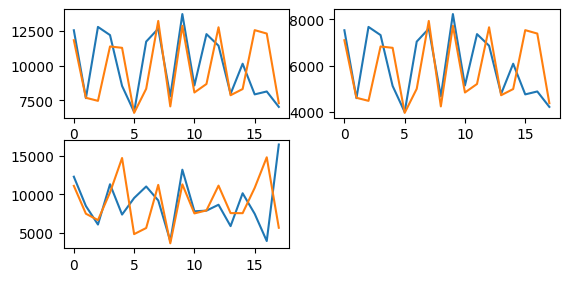

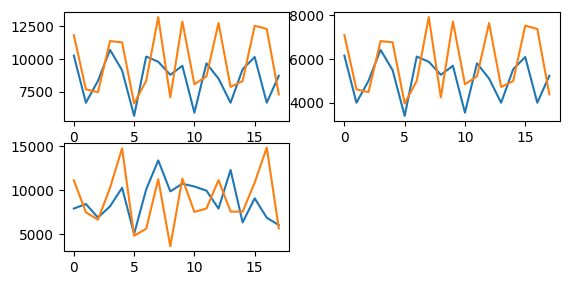

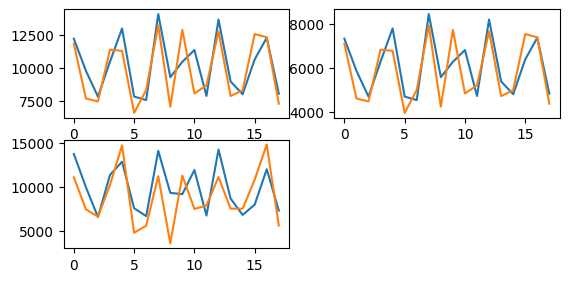

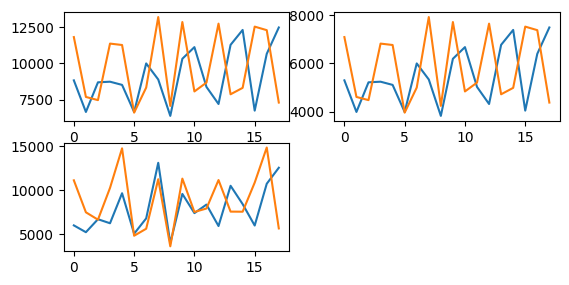

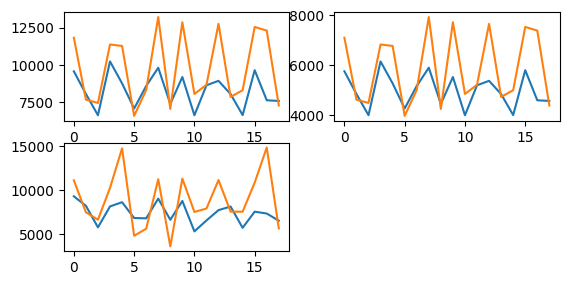

In [375]:
'''
min_error - variável a ser subsituída pelos melhores resultads obtidos  na etapa de validação
bres - melhor resultado obtido ao final da execução de todos o comitê de previsores
initial_values - Não entendi pq pega a esta linha em específico para o predict(?)
in_sample - dados de treinamento
out_sample - dados de teste (a confirmr)
num_predictors - total de previsores (regras formadas) no ensemble
'''

min_error = 300.0

bres = min_error

initial_values = all_lagged[yp_lagged.shape[0],:].reshape(1,-1)
in_sample = deepcopy(training_set)
out_sample = deepcopy(val_set)


print('='*89)

print(f'Shape of in-sample is {in_sample.shape[0]}')
#assert in_sample.shape[0] == h_train//7
print(f'Shape of lagged data is {yp_lagged.shape[0]}')
#assert yp_lagged1.shape[0] == h_train//manual_pattern
print(f'Shape of validation set is {out_sample.shape[0]}')

print('='*89)


#num_predictors = 1

#Concatenate rules
for i in range(num_predictors):
    
    try:
        _, _, yp_lagged_ = preprocess_data.generate_subsamples(correlation_array=correlation_array,
                                                               autocorrelation_matrix=autocorrelation_matrix,
                                                               num_inputs=num_input, 
                                                               in_sample=in_sample, 
                                                               yt = yt, 
                                                               yp = yp, 
                                                               yp_lagged = deepcopy(yp_lagged))

        Fuzzyfy, mX_, mY_, mf_params_, mX_lagged_ = fuzzy_transform(fuzzy_method, num_series, training_set, num_groups, yp, yt, deepcopy(yp_lagged_), lag)
        
        model = autoMFIS(diff_series=diff_series,
                         detrend_series=detrend_series,
                         fuzzy_method=fuzzy_method,
                         solve_method=solve_method,
                         defuzz_method=defuzz_method, 
                         num_groups = num_groups,
                         inputs=num_input, 
                         h_prev = out_sample.shape[0], 
                         num_series = num_series, 
                         max_rulesize = max_rulesize, 
                         min_activation = min_activation, 
                         lag = lag,
                         target_position=1, 
                         hide_values = False, 
                         form_method = form_method, 
                         split_method = split_method, 
                         show=False)

        model.set_fuzzification(Fuzzyfy, mf_params_, mX_, mY_, deepcopy(mX_lagged_)) 

        # not_select_subsample = np.random.choice(total_number,total_number-num_input,replace=False)
        # t_mX_lagged = deepcopy(mX_lagged_)
        # t_mX_lagged[:,:,not_select_subsample] = 0

        # model.set_fuzzification(Fuzzyfy, mf_params_, mX_, mY_, t_mX_lagged)        

        t_mX_lagged, complete_rules, prem_terms, rules, agg_training, wd_ = model.train(dataset,
                                                                                        correlation_array = correlation_array,
                                                                                        autocorrelation_matrix = autocorrelation_matrix,
                                                                                        in_sample=in_sample,
                                                                                        out_sample=out_sample,
                                                                                        lag_notused=[],
                                                                                        debug=False)



        #complete_rules, prem_terms, rules, agg_training, wd_ = autoMFIS(data_,lag=lag, lag_notused=lag_notused, not_used_lag=not_used_lag,not_select_subsample=not_select_subsample, h_prev = out_sample.shape[0], diff_series=diff_series, detrend_series=detrend_series, num_series=num_series, max_rulesize=max_rulesize, min_activation=min_activation, fuzzy_method=fuzzy_method, num_groups=num_groups,solve_method='mqr',defuzz_method=defuzz_method,yt=yt1,yp=yp1,yp_lagged=yp_lagged1,in_sample=in_sample,out_sample=out_sample)
        print('='*89)
        print(f'Predict on validation set - #{i}')
        #Prediction of a single subset
        #yt_totest, errors = model.predict(initial_values, data=norm_data, in_sample = yt, out_sample=val_set, agg_training=agg_training,h_prev=out_sample.shape[0],n_attempt=f'p_subsample_{i}',wd_=wd_,ensemble_antecedents=rules,ensemble_rules=complete_rules, filepath=filepath, lim=min_error, fig_axis=[4,2],ndata=MA_dataset,show=False)
        predicted_values = np.zeros(test_data.shape)
        yt_totest, errors = model.predict(initial_values,
                                          correlation_array = correlation_array,
                                          autocorrelation_matrix = autocorrelation_matrix, 
                                          data=dataset, 
                                          in_sample = yt, 
                                          out_sample=val_set, 
                                          agg_training=agg_training,
                                          h_prev=h_test,
                                          n_attempt=f'p_subsample_{i}',
                                          wd_=wd_,
                                          ensemble_antecedents=rules,
                                          ensemble_rules=complete_rules, 
                                          filepath=filepath, 
                                          lim=min_error, 
                                          fig_axis=[4,2],
                                          ndata=['1', '2'],
                                          show=False,
                                          plot_image = True)
        #real_yt = scaler.inverse_transform(yt_totest)
        real_yt = deepcopy(yt_totest)
        #errors = smape(real_yt,test_data)
        res = np.mean(2*abs(test_data-real_yt) / (abs(real_yt) + abs(test_data)))
        print(res)
        print(f'errors: {errors}')
        print('='*89)
        if res < bres:
            bres = res 
            y_best = yt_totest 
            best_complete_rules = complete_rules
            best_prem_terms = prem_terms
            best_rules = rules
            best_agg_training = agg_training 
            best_wd_ = wd_
            best_t_mx_lagged = t_mX_lagged 

        plt.figure()
        for n in range(real_yt.shape[1]):
            plt.subplot(3,2,n+1)
            plt.plot(real_yt[:,n])
            plt.plot(test_data[:,n])
        #print(complete_rules)
        
        if res < 0.18:
            if ensemble_rules is None:
                ensemble_rules = complete_rules
                ensemble_prem_terms = prem_terms
                ensemble_antecedents = rules
                #print(ensemble_rules.shape)
            else:
                ensemble_rules = np.concatenate((ensemble_rules, complete_rules))
                
                ensemble_prem_terms = np.concatenate((ensemble_prem_terms,prem_terms))
                ensemble_antecedents = np.concatenate((ensemble_antecedents,rules))
                #print(ensemble_rules.shape)
                #print(ensemble_prem_terms.shape)
            #print(ensemble_rules[:,0])
        elif ensemble_rules is None and i == num_predictors - 1:
            ensemble_rules = complete_rules
            ensemble_prem_terms = prem_terms
            ensemble_antecedents = rules
            print('No rules match criteria. Using rules to fill the gap')
        #print('RMSE Errors = {}'.format(errors[0,:]))
        print('RRSE Errors = {}'.format(errors[1,:]))
        #print('Mean RRSE Error = {}'.format(np.mean(errors[1,:])))
        
        
        print('RRSE Errors = {}'.format(errors[1,:]))
        if errors[1,0] < min_error:
            ensemble_rules = deepcopy(complete_rules)
            ensemble_prem_terms = deepcopy(prem_terms)
            ensemble_antecedents = deepcopy(rules)
            wd__ = wd_
            min_error = errors[1,0]

    except Exception as e:
        print(e)
        pass
    

In [376]:
res

0.21001310982085958

In [377]:
model.set_fuzzification(Fuzzyfy, mf_params_, mX_, mY_, best_t_mx_lagged)

In [378]:
best_yt_totest, best_errors = model.predict(initial_values,
                                            correlation_array = correlation_array,
                                            autocorrelation_matrix = autocorrelation_matrix, 
                                            data=dataset, 
                                            out_sample=test_data, 
                                            agg_training=best_agg_training,
                                            h_prev=h_test,
                                            n_attempt='best_model',
                                            wd_=best_wd_ ,
                                            ensemble_antecedents=best_rules,
                                            ensemble_rules=best_complete_rules,
                                            filepath=filepath,
                                            lim=min_error, 
                                            fig_axis=[4,2],
                                            ndata=dataset.shape[1],
                                            show=False,
                                            plot_image = True)

best_real_yt = deepcopy(best_yt_totest)
#errors = smape(real_yt,test_data)
best_results = np.mean(2*abs(test_data-best_real_yt) / (abs(best_real_yt) + abs(test_data)))

In [379]:
best_rules

array([[list([(6, 3)])],
       [list([(11, 1)])],
       [list([(11, 4)])],
       [list([(25, 1)])],
       [list([(25, 3)])],
       [list([(27, 1)])],
       [list([(27, 3)])],
       [list([(37, 1)])],
       [list([(37, 4)])],
       [list([(39, 1)])],
       [list([(39, 4)])],
       [list([(59, 1)])],
       [list([(59, 2)])],
       [list([(71, 1)])],
       [list([(71, 2)])],
       [list([(33, 1)])],
       [list([(42, 0)])]], dtype=object)

In [380]:
best_rules.shape

(17, 1)

In [381]:
best_errors

array([[1.34775767e+03, 8.08614808e+02, 2.01506180e+03],
       [1.02589675e+03, 6.15522901e+02, 1.51282911e+03],
       [1.00887325e-01, 1.00887552e-01, 2.11714396e-01]])

In [382]:
best_results

0.1284660199688712

In [383]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

out_sample=test_data

for i in range(num_series):
    idx = np.where(np.isnan(yt_totest[:,i]))

    if len(idx) > 0:
        best_yt_totest[:,i] = pd.DataFrame(best_yt_totest[:,i]).fillna(method='bfill').values.ravel()

if diff_series:
    #Y__ = yt_totest + data[in_sample.shape[0]:data.shape[0]-1,:]
    #Yt__ = out_sample + data[in_sample.shape[0]:data.shape[0]-1,:]
    y_pp = np.roll(best_yt_totest,1,axis=0)
    y_pp[0,:] = dataset[in_sample.shape[0],:]
    y_tt = np.roll(out_sample,1,axis=0)
    y_tt[0,:] = dataset[in_sample.shape[0],:]
    Y__ = best_yt_totest + y_pp
    Yt__ = out_sample + y_tt
    print('diff series')

elif detrend_series:
    Y__ = best_yt_totest + trends[in_sample.shape[0]:,:]
    Yt__ = out_sample + trends[in_sample.shape[0]:,:]

else:
    Y__ = best_yt_totest
    Yt__ = out_sample
errors = np.zeros(shape=(3,num_series))
rmse = sqrt(mean_squared_error(Yt__[:,0], Y__[:,0]))
mae = mean_absolute_error(Yt__[:,0], Y__[:,0])
MAPE = mape(Yt__[:, 0], Y__[:, 0])
errors[0,0] = rmse
errors[1,0] = mae
errors[2, 0] = MAPE

with open('results V2/best_model.txt','w') as f:
    for i in range(num_series):
        rmse = sqrt(mean_squared_error(Y__[:,i], Yt__[:,i]))
        mae = mean_absolute_error(Y__[:,i], Yt__[:,i])
        MAPE = mape(Yt__[:, i], Y__[:, i])
        #rrse_error = rrse(Y__[:,i], Yt__[:,i])

        #print('Outsample RRSE for serie {} is {} \n'.format(i+1,rrse_error), file=f)
        print('Outsample RMSE for serie {} is {} \n'.format(i+1,rmse), file=f)
        print('Outsample MAE for serie {} is {} \n'.format(i+1,mae), file=f)
        #print('Outsample SMAPE for serie {} is {} \n'.format(i+1,smape(Yt__[:,i],Y__[:,i])),file=f)
        print('Outsample MAPE for serie {} is {} \n'.format(i + 1, 100*MAPE), file=f)
        errors[0,i] = rmse
        errors[1, i] = mae
        errors[2, i] = MAPE
        #errors[1,i] = rrse_error

plt.figure(figsize=(16*3,10*2))
k = 1

fig_axis=[3,2]

for i in range(num_series):
    plt.subplot(fig_axis[0],fig_axis[1],k)
    plt.title(['1', '2'],fontsize=32)
    plt.plot(best_yt_totest[:,i],color='orange')
    plt.plot(out_sample[:,i],color='blue')
    plt.legend(['Previsto','Real'], fontsize=26)
    plt.xlabel('Tempo(h)',fontsize=26)
    plt.ylabel('Valor',fontsize=26)
    k += 1


plt.savefig('results V2/best_model.png')    #plt.show()
plt.close()

In [384]:
model.set_fuzzification(Fuzzyfy, mf_params_, mX_, mY_, mX_lagged_)
ensemble_wd_, ensemble_agg_training = model.reweight_mf(mY_,ensemble_rules,ensemble_prem_terms)

In [385]:
ensemble_yt_totest, ensemble_errors = model.predict(initial_values,
                                                    correlation_array = correlation_array,
                                                    autocorrelation_matrix = autocorrelation_matrix, 
                                                    data=dataset, 
                                                    out_sample=test_data, 
                                                    agg_training=ensemble_agg_training,
                                                    h_prev=h_test,
                                                    n_attempt='ensemble_model',
                                                    wd_=ensemble_wd_ ,
                                                    ensemble_antecedents=ensemble_antecedents,
                                                    ensemble_rules=ensemble_rules,
                                                    filepath=filepath,
                                                    lim=min_error, 
                                                    fig_axis=[4,2],
                                                    ndata=[],
                                                    show=False,
                                                    plot_image = True)

ensemble_real_yt = deepcopy(ensemble_yt_totest)
#errors = smape(real_yt,test_data)
ensemble_results = np.mean(2*abs(test_data-ensemble_real_yt) / (abs(ensemble_real_yt) + abs(test_data)))

In [386]:
ensemble_rules

array([[list([(36, 1), (0, 4)]), list([(36, 1), (1, 4)]),
        list([(36, 1), (2, 2)])],
       [list([(36, 4), (0, 1)]), list([(36, 4), (1, 1)]),
        list([(36, 4), (2, 0)])],
       [list([(45, 0), (0, 2)]), list([(45, 0), (1, 2)]),
        list([(45, 0), (2, 3)])],
       [list([(24, 1), (0, 3)]), list([(24, 1), (1, 3)]),
        list([(24, 1), (2, 2)])],
       [list([(24, 3), (0, 1)]), list([(24, 3), (1, 1)]),
        list([(24, 3), (2, 1)])],
       [list([(27, 1), (0, 1)]), list([(27, 1), (1, 1)]),
        list([(27, 1), (2, 1)])],
       [list([(35, 1), (0, 1)]), list([(35, 1), (1, 1)]),
        list([(35, 1), (2, 1)])],
       [list([(12, 1), (0, 4)]), list([(12, 1), (1, 4)]),
        list([(12, 1), (2, 2)])],
       [list([(12, 4), (0, 1)]), list([(12, 4), (1, 1)]),
        list([(12, 4), (2, 0)])],
       [list([(39, 1), (0, 1)]), list([(39, 1), (1, 1)]),
        list([(39, 1), (2, 1)])],
       [list([(39, 4), (0, 2)]), list([(39, 4), (1, 2)]),
        list([(39, 4),

In [387]:
ensemble_rules.shape

(207, 3)

In [388]:
ensemble_errors

array([[1.57487054e+03, 9.44824445e+02, 3.46254142e+03],
       [1.20589565e+03, 7.23454256e+02, 2.73324851e+03],
       [1.14911372e-01, 1.14897969e-01, 3.74250669e-01]])

In [389]:
ensemble_results

0.1804459431716271

In [390]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for i in range(num_series):
    idx = np.where(np.isnan(yt_totest[:,i]))

    if len(idx) > 0:
        ensemble_yt_totest[:,i] = pd.DataFrame(ensemble_yt_totest[:,i]).fillna(method='bfill').values.ravel()

if diff_series:
    #Y__ = yt_totest + data[in_sample.shape[0]:data.shape[0]-1,:]
    #Yt__ = out_sample + data[in_sample.shape[0]:data.shape[0]-1,:]
    y_pp = np.roll(ensemble_yt_totest,1,axis=0)
    y_pp[0,:] = dataset[in_sample.shape[0],:]
    y_tt = np.roll(out_sample,1,axis=0)
    y_tt[0,:] = dataset[in_sample.shape[0],:]
    Y__ = ensemble_yt_totest + y_pp
    Yt__ = out_sample + y_tt
    print('diff series')

elif detrend_series:
    Y__ = ensemble_yt_totest + trends[in_sample.shape[0]:,:]
    Yt__ = out_sample + trends[in_sample.shape[0]:,:]

else:
    Y__ = ensemble_yt_totest
    Yt__ = out_sample
errors = np.zeros(shape=(3,num_series))
rmse = sqrt(mean_squared_error(Yt__[:,0], Y__[:,0]))
mae = mean_absolute_error(Yt__[:,0], Y__[:,0])
MAPE = mape(Yt__[:, 0], Y__[:, 0])
errors[0,0] = rmse
errors[1,0] = mae
errors[2, 0] = MAPE

with open('results V2/ensemble_model.txt','w') as f:
    for i in range(num_series):
        rmse = sqrt(mean_squared_error(Y__[:,i], Yt__[:,i]))
        mae = mean_absolute_error(Y__[:,i], Yt__[:,i])
        MAPE = mape(Yt__[:, i], Y__[:, i])
        #rrse_error = rrse(Y__[:,i], Yt__[:,i])

        #print('Outsample RRSE for serie {} is {} \n'.format(i+1,rrse_error), file=f)
        print('Outsample RMSE for serie {} is {} \n'.format(i+1,rmse), file=f)
        print('Outsample MAE for serie {} is {} \n'.format(i+1,mae), file=f)
        #print('Outsample SMAPE for serie {} is {} \n'.format(i+1,smape(Yt__[:,i],Y__[:,i])),file=f)
        print('Outsample MAPE for serie {} is {} \n'.format(i + 1, 100*MAPE), file=f)
        errors[0,i] = rmse
        errors[1, i] = mae
        errors[2, i] = MAPE
        #errors[1,i] = rrse_error

plt.figure(figsize=(16*3,10*2))
k = 1

fig_axis=[3,2]

for i in range(num_series):
    plt.subplot(fig_axis[0],fig_axis[1],k)
    plt.title(['1', '2'],fontsize=20)
    plt.plot(ensemble_yt_totest[:,i],color='orange')
    plt.plot(out_sample[:,i],color='blue')
    plt.legend(['Previsto','Real'])
    plt.xlabel('Tempo(h)',fontsize=15)
    plt.ylabel('Valor',fontsize=15)
    k += 1


plt.savefig('results V2/ensemble_model.png')    #plt.show()
plt.close()

In [391]:
cnt = 0
list_remove = []

dict_val = {}

for i in range(ensemble_prem_terms.shape[0]):
    except_one = np.copy(ensemble_prem_terms)
    v = except_one[i,:]
    idx = np.argwhere(v > 0.5).ravel()
    v = v[idx]
    rest = np.delete(except_one, i, axis=0)
    rest = rest[:,idx]
    cpare = np.tile(v,(rest.shape[0],1))
    m = np.minimum(rest,cpare) 
    M = np.maximum(rest,cpare) + 10e-15
    res = m/M
    mean = np.mean(res,axis=1)
    #plt.figure()
    #plt.hist(mean)
    
    vv = np.argwhere(mean > 0.6).ravel()

    if vv.shape[0] > 0:    
        vv[vv > i] += 1
        vv2 = np.append(vv,np.array([i]))

        eval_v = ensemble_prem_terms[vv2][:,idx]

        t = np.mean(eval_v,axis=1)

        keep_val = vv2[np.argmax(t)]
        vmax = np.max(t)
        print(f'{keep_val} : {vmax}')
        if keep_val not in list_remove:
            dict_val[keep_val] = 1
            list_remove.append(keep_val)
        else:
            dict_val[keep_val] = dict_val[keep_val] + 1

        cnt += np.argwhere(mean > 0.6).shape[0]

7 : 0.75401089720977
21 : 0.9087787232458164
11 : 0.8275987681547525
35 : 0.765378163777878
4 : 0.8412468867375735
23 : 0.7642426237316737
19 : 0.75401089720977
0 : 0.75401089720977
21 : 0.9087787232458164
27 : 0.7680269274431835
124 : 0.9087787232458159
2 : 0.8275987681547525
39 : 0.817252811642656
40 : 0.7383637522386287
46 : 0.8229329739837091
47 : 0.725632057085852
31 : 0.8237225573086433
3 : 0.9087787232458164
119 : 0.8358581957743034
6 : 0.75401089720977
3 : 0.9087787232458164
21 : 0.765378163777878
115 : 0.8412468867375735
5 : 0.7642426237316737
24 : 0.8358581957743034
140 : 0.7690359682587042
26 : 0.8559588684533318
9 : 0.7680269274431835
124 : 0.9087787232458159
41 : 0.8266844145940657
42 : 0.7443159187636711
16 : 0.8237225573086433
49 : 0.7131036992008121
33 : 0.75401089720977
34 : 0.8161053526984028
3 : 0.765378163777878
50 : 0.8048527922632729
65 : 0.8048527922632729
51 : 0.808826083594568
12 : 0.817252811642656
13 : 0.7383637522386287
29 : 0.8266844145940657
30 : 0.7443159

In [392]:
filtered_rules = deepcopy(ensemble_rules[list_remove,:])
filtered_prems = deepcopy(ensemble_prem_terms[list_remove,:])
filtered_antecedents = deepcopy(ensemble_antecedents[list_remove,:])

In [393]:
model.set_fuzzification(Fuzzyfy, mf_params_, mX_, mY_, mX_lagged_)
filtered_wd_, filtered_agg_training = model.reweight_mf(mY_,filtered_rules,filtered_prems)

In [394]:
filtered_yt_totest, filtered_errors = model.predict(initial_values,
                                                    correlation_array = correlation_array,
                                                    autocorrelation_matrix = autocorrelation_matrix, 
                                                    data=dataset, 
                                                    out_sample=test_data, 
                                                    agg_training=filtered_agg_training,
                                                    h_prev=h_test,
                                                    n_attempt='filtered_model',
                                                    wd_=filtered_wd_,
                                                    ensemble_antecedents=filtered_antecedents,
                                                    ensemble_rules=filtered_rules, 
                                                    filepath=filepath, lim=min_error,
                                                    fig_axis=[4,2],
                                                    ndata=[],
                                                    show=False,
                                                    plot_image = True)

filtered_real_yt = deepcopy(filtered_yt_totest)
#errors = smape(real_yt,test_data)
filtered_results = np.mean(2*abs(test_data-filtered_real_yt) / (abs(filtered_real_yt) + abs(test_data)))

In [395]:
filtered_rules.shape

(71, 3)

In [396]:
filtered_errors

array([[1.38560299e+03, 8.31385144e+02, 3.77514117e+03],
       [1.09859154e+03, 6.59132773e+02, 3.25849956e+03],
       [1.10582026e-01, 1.10575603e-01, 4.60621343e-01]])

In [397]:
filtered_results

0.18995863973073115

In [398]:
for i in range(num_series):
    idx = np.where(np.isnan(yt_totest[:,i]))

    if len(idx) > 0:
        filtered_yt_totest[:,i] = pd.DataFrame(filtered_yt_totest[:,i]).fillna(method='bfill').values.ravel()

if diff_series:
    #Y__ = yt_totest + data[in_sample.shape[0]:data.shape[0]-1,:]
    #Yt__ = out_sample + data[in_sample.shape[0]:data.shape[0]-1,:]
    y_pp = np.roll(filtered_yt_totest,1,axis=0)
    y_pp[0,:] = dataset[in_sample.shape[0],:]
    y_tt = np.roll(out_sample,1,axis=0)
    y_tt[0,:] = dataset[in_sample.shape[0],:]
    Y__ = filtered_yt_totest + y_pp
    Yt__ = out_sample + y_tt
    print('diff series')

elif detrend_series:
    Y__ = filtered_yt_totest + trends[in_sample.shape[0]:,:]
    Yt__ = out_sample + trends[in_sample.shape[0]:,:]

else:
    Y__ = filtered_yt_totest
    Yt__ = out_sample
errors = np.zeros(shape=(3,num_series))
rmse = sqrt(mean_squared_error(Yt__[:,0], Y__[:,0]))
mae = mean_absolute_error(Yt__[:,0], Y__[:,0])
MAPE = mape(Yt__[:, 0], Y__[:, 0])
errors[0,0] = rmse
errors[1,0] = mae
errors[2, 0] = MAPE

with open('results V2/filtered_model.txt','w') as f:
    for i in range(num_series):
        rmse = sqrt(mean_squared_error(Y__[:,i], Yt__[:,i]))
        mae = mean_absolute_error(Y__[:,i], Yt__[:,i])
        MAPE = mape(Yt__[:, i], Y__[:, i])
        #rrse_error = rrse(Y__[:,i], Yt__[:,i])

        #print('Outsample RRSE for serie {} is {} \n'.format(i+1,rrse_error), file=f)
        print('Outsample RMSE for serie {} is {} \n'.format(i+1,rmse), file=f)
        print('Outsample MAE for serie {} is {} \n'.format(i+1,mae), file=f)
        #print('Outsample SMAPE for serie {} is {} \n'.format(i+1,smape(Yt__[:,i],Y__[:,i])),file=f)
        print('Outsample MAPE for serie {} is {} \n'.format(i + 1, 100*MAPE), file=f)
        errors[0,i] = rmse
        errors[1, i] = mae
        errors[2, i] = MAPE
        #errors[1,i] = rrse_error

plt.figure(figsize=(16*3,10*2))
k = 1

fig_axis=[3,2]

for i in range(num_series):
    plt.subplot(fig_axis[0],fig_axis[1],k)
    plt.title(['1', '2'],fontsize=20)
    plt.plot(filtered_yt_totest[:,i],color='orange')
    plt.plot(out_sample[:,i],color='blue')
    plt.legend(['Previsto','Real'])
    plt.xlabel('Tempo(h)',fontsize=15)
    plt.ylabel('Valor',fontsize=15)
    k += 1


plt.savefig('results V2/filtered_model.png')    #plt.show()
plt.close()

In [399]:
#Basic imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from math import sqrt
from copy import deepcopy

#Imports from sklearn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

#autoMFIS modules imports
from fuzzyfication import Fuzzification
from tnorm import tnorm_product
from formulation import Formulation
from split import Split
from reweight import Reweight
from defuzzification import Defuzzification
from metrics import mape, smape
from preprocessing import Preprocess
from basicfuzzy import trimf, trapmf
from utils import *
from metrics import rrse

#Predict imports
from predict import plot_predict, plot_training

#Some functions.
#TODO - Check if these functions are already on utils module.

def remove_lags(mX_lagged_,lag_notused,num_series,lag):
    assert num_series == lag_notused.shape[0]
    lags_used = np.array(lag_notused)
    for n in range(num_series):
        lag_serie = lag_notused[n]
        lin = np.linspace(0,lag-1,lag)
        lag_used = np.setdiff1d(lin,lag_serie) + n*lag
        lag_used = [int(f) for f in lag_used]
        lags_used[n] = lag_used
        print(lag_used)
        if n == 0:
            new_mX = mX_lagged_[:,:,lag_used[:]]   
            #print(new_mX.shape) 
        else:
            new_mX = np.concatenate((new_mX,mX_lagged_[:,:,lag_used]),axis=2)
    
    return new_mX, lags_used


class autoMFIS2():
    '''
    Automatic Fuzzy System for multivariate time series forecasting.
    
    \n Parameters are divided into methods, booleans and numeric parameters.
    \n Methods:
    \n - fuzzy_method: Method for fuzzy set generation. Options: 'mfdef_triangle' (uniform division of fuzzy sets), 'mfdef_cluster' (division of centers by clustering method).
    \n - form_method: Method for formulation evaluation. Options: 'freq' (frequency), 'mean' (mean of activation), 'nmean' (non-zero mean of activation).
    \n - solve_method: Method for optimization problem. Options: 'None' (skip reweight), 'mqr' (Constrained optimization).
    \n - defuzz_method: Method for defuzzification. Options: 'cog' (center of gravity), 'mom' (mean of maximum), 'height' (height method).
    
    \n Boolean parameters:
    \n - diff_series: If true, use diff series preprocessing.
    \n - detrend_series: If true, use detrend series preprocessing.
    \n - hide_values: If true, mask some desired series.

    \n Numeric parameters:
    \n - num_groups: Number of group sets during fuzzification.
    \n - h_prev: Prediction horizon, relative to the problem.
    \n - num_series: Number of input series.
    \n - min_activation: Min. activation to be elected as antecedent rule.
    \n - max_rulesize: Max. of antencedents
    \n - lag: Max. lags.
    '''
    def __init__(self,diff_series=False,detrend_series=False,fuzzy_method='mfdef_triangle',solve_method='None',defuzz_method='mom', num_groups = 5,
        h_prev = 1, num_series = 1, max_rulesize = 5, min_activation = 0.5, lag = 1, hide_values = False, form_method = 'nmean', show=False, split_method = 'FCD'):
        self.diff_series = diff_series
        self.detrend_series = detrend_series

        self.fuzzy_method = fuzzy_method
        self.solve_method = solve_method 
        self.defuzz_method = defuzz_method
        self.num_groups = num_groups
        self.form_method = form_method
        self.hide_values = hide_values
        self.split_method = split_method

        self.h_prev = h_prev
        self.num_series = num_series 
        self.max_rulesize = max_rulesize
        self.min_activation = min_activation
        self.lag = lag 
        self.show = show

        self.set_fuzzy = False

    def set_fuzzification(self, Fuzzify, mf_params, mX, mY, mX_lagged):
        self.set_fuzzy = True
        self.Fuzzify = Fuzzify
        self.mf_params = mf_params
        self.mX = mX
        self.mY = mY
        self.mX_lagged = mX_lagged

    def train(self, data, yt=None,yp=[],yp_lagged=[],in_sample=None,out_sample=[],not_select_subsample=[], lag_notused=[],debug=False):
        '''
        Training step for autoMFIS. It's divided into 6 steps, namely:
        \n - 0. Preprocessing (if not given)
        \n - 1. Fuzzification
        \n - 2. Formulation
        \n - 3. Splitting
        \n - 4. Reweight
        \n - 5. Defuzzification
        '''
        #Preprocessing
        if in_sample is None:
            print('In-sample not given to autoMFIS module. Running preprocessing...')
            prep = Preprocess(data, h_prev = self.h_prev, num_series = self.num_series)
            in_sample, out_sample = prep.split_data()
            yt, yp, yp_lagged = prep.delay_input(in_sample = in_sample, lag = self.lag)


        #Fuzzificacao
        #Lembrete: 
        #axis 0 - Registros da série
        #axis 1 - Valor de pertinência ao conjunto Fuzzy
        #axis 2 - Numero de séries
        if debug:
            print('Step 1 - Fuzzification')
        
        Fuzzify, mf_params_, mX_, mY_, mX_lagged_ = self.fuzzify(in_sample, yp, yt, yp_lagged, not_select_subsample)
        
        #assert (mX_lagged_[:,:,not_select_subsample] == 0).all(), "Cant hide subsample"

        #print(np.unique(mX_))
        #print(np.unique(mY_))
        #print(np.unique(mX_lagged_))
        #print(mX_lagged_[:,:,not_select_subsample])
        ############## Formulacao
        
        if self.hide_values:
            new_mX, _lags_used = remove_lags(mX_lagged_,lag_notused,self.num_series,self.lag)

        else:
            new_mX = mX_lagged_
        
        #print(np.unique(new_mX))
        #Formulation
        if debug:
            print('Step 2 - Formulation')
        rules, prem_terms = self.formulate(new_mX)

        #Splitting method
        if debug:
            print('Step 3 - Split')
        complete_rules = self.split_(mY_, prem_terms, rules)

        return complete_rules, prem_terms, rules
    


    def fuzzify(self,in_sample, yp, yt, yp_lagged, not_select_subsample):

        if self.set_fuzzy:
            Fuzzify = self.Fuzzify
            mf_params_ = self.mf_params

            mX_ = self.mX
            mY_ = self.mY
            mX_lagged_ = self.mX_lagged

            #mX_lagged_[:,:,not_select_subsample] = 0


        else:
            print('Fuzzy not given')
            Fuzzify = Fuzzification(self.fuzzy_method)
            self.Fuzzify = Fuzzify
            first_time = True
            for n in range(self.num_series):
                
                _, mf_params = Fuzzify.fuzzify(in_sample[:,n],np.array([]),num_groups=self.num_groups)
                mX, _ = Fuzzify.fuzzify(yp[:,n],mf_params,num_groups=self.num_groups)
                mY, _ = Fuzzify.fuzzify(yt[:,n],mf_params,num_groups=self.num_groups)
                if first_time:
                    mX_ = np.ndarray([mX.shape[0],mX.shape[1], self.num_series])
                    mY_ = np.ndarray([mY.shape[0],mY.shape[1], self.num_series])
                    mf_params_ = np.ndarray([mf_params.shape[0], self.num_series])
                    first_time = False
                mX_[:,:,n] = mX
                mY_[:,:,n] = mY
                mf_params_[:,n] = mf_params.ravel()
                #print(mf_params)
                #print(mX.shape)

            #self.mf_params = mf_params
            #self.mf_params_ = mf_params_
            self.mX_ = mX_
            self.mY_ = mY_ 

            mX_lagged_ = np.ndarray([mX_.shape[0],mX_.shape[1],yp_lagged.shape[1]])
            for i in range(self.num_series):
                mf_params = mf_params_[:,i]
                for j in range(self.lag):
                    mX, _ = Fuzzify.fuzzify(yp_lagged[:,i*self.lag+j],mf_params,num_groups=self.num_groups)
                    mX_lagged_[:,:,i*self.lag+j] = mX
                    #print(i*lag+j)
            mX_lagged_[:,:,not_select_subsample] = 0




        return Fuzzify, mf_params_, mX_, mY_, mX_lagged_

    def formulate(self, new_mX):
        form = Formulation(self.max_rulesize,self.min_activation,self.form_method)
        rules, _, prem_terms = form.run(new_mX)
        return rules, prem_terms

    def split_(self, mY_, prem_terms, rules):
        split = Split(mY_,prem_terms,self.num_series)
        complete_rules = split.run(rules, min_activation = self.min_activation, method=self.split_method)
        return complete_rules

    def reweight_mf(self, mY_,complete_rules,prem_terms):
        rw = Reweight(mY_,complete_rules,prem_terms)
        wd_, agg_training = rw.run(self.solve_method,debug=False)

        return wd_, agg_training

    def defuzzify(self, mf_params_, agg_training):
        defuzz = Defuzzification(mf_params_,self.num_series)
        _y_predict = defuzz.run(self.defuzz_method,agg_training,show=self.show)


    def predict(self, initial_values, lags_used = [], ndata=[''], data=[], in_sample=[], out_sample=[], agg_training=None,h_prev=0,n_attempt=0,wd_=[],ensemble_antecedents=[],ensemble_rules=[],not_used_lag = False, filepath='',lim=0, fig_axis=[3,2], show = False, plot_image = True):
        '''
        Module to time series forecasting. It uses multi-stepping in order to evaluate the model.
        INPUTS:
        \n - Fuzzify: Object containing informations about Fuzzification.
        \n - lags_used: If not_used_lags is true, masks series that isn't in list.
        \n - num_groups: Number of fuzzy sets.
        \n - ndata: name of data (e.g. column header)
        \n - data: data of the problem
        \n - in_sample: in_sample set of data
        \n - out_sample: out_sample set of data
        \n - lag:
        \n - mf_params: Membership function parameters
        \n - agg_training: Aggregation terms in training set. Used to simplify deffuzification of training set.
        \n - yp_lagged
        \n - h_prev:
        #TODO - Continue this list

        VARIABLES:
        \n - y_predict_: Training set prediction
        \n - yp_totest: Input pattern to evaluate prediction
        \n - yt_totest: Output data, for each horizon and serie.
        '''
        
        defuzz = Defuzzification(self.mf_params,self.num_series)
        if agg_training is not None:
            y_predict_ = defuzz.run(self.defuzz_method,agg_training)

        yp_totest = initial_values
        yt_totest = np.zeros((h_prev,self.num_series))

        #Prediction - Multi-step
        for h_p in range(h_prev):

            #Check activated terms.
            mX_values_in = np.zeros((1,self.mf_params.shape[0],yp_totest.shape[1]))
            antecedents_activated = []
            it = 0
            for i in range(self.num_series):
                mf_params = self.mf_params[:,i]
                for j in range(self.lag):
                    mX, _ = self.Fuzzify.fuzzify(np.array([yp_totest[0,i*self.lag+j]]),mf_params,num_groups=self.num_groups)
                    mX_values_in[:,:,i*self.lag+j] = mX

                    idx_nonzero = np.where(mX[0,:] > 0)
                    idx_nonzero = idx_nonzero[0]

                    if not_used_lag:
                        for k in range(idx_nonzero.shape[0]):
                            if j in lags_used[i]:
                                antecedents_activated.append((it,idx_nonzero[k]))
                            else:
                                pass
                        it += 1
                    
                    else:
                        for k in range(idx_nonzero.shape[0]):
                            antecedents_activated.append((i*self.lag+j,idx_nonzero[k]))

            '''
            if not_used_lag:
                mX_values_in, _ = remove_lags(mX_values_in,lag_notused,num_series,lag)


            prem_terms_test = np.zeros((ensemble_antecedents.shape[0],1))
            '''
            rules_idx = []
            check_idx = 0
            #Checking for every rule in dataset if it's activated
            #TODO - Check if we can modify this into enumerate, avoiding check_idx += 1 every time.
            for n_rule in ensemble_antecedents:
                #print('Rule {} is {}'.format(check_idx,test(n_rule,antecedents_activated)))
                if test(n_rule,antecedents_activated):
                    rules_idx.append(check_idx)
                check_idx += 1
                
            prem_activated = np.zeros((ensemble_antecedents.shape[0],))
            for i in rules_idx:
                prem_activated[i,] = prem_term(ensemble_antecedents[i,0],mX_values_in)
            
            agg_test = np.zeros((wd_.shape))
            for i in range(self.num_series):
                for j in rules_idx:
                    rule = ensemble_rules[j,i]
                    consequent = rule[-1]
                    agg_test[j,consequent[1],i] = prem_activated[j,]
                    
            weight_agg = np.multiply(agg_test,wd_)
            weight_ = np.zeros((weight_agg.shape[1],weight_agg.shape[2]))
            for i in range(weight_.shape[1]):
                weight_[:,i] = weight_agg[:,:,i].max(axis=0)

            w_todefuzz = np.reshape(weight_,(1,weight_.shape[0],weight_.shape[1]))
            
            #Defuzzification in fact
            y_pred = defuzz.run(self.defuzz_method,w_todefuzz,show=show)
            
            #Store predicted value into yt_totest.
            yt_totest[h_p,:] = y_pred
            
            #Last step, we use the predicted output to compose input data.
            y_temp = np.zeros(yp_totest.shape)
            assert y_temp.shape == yp_totest.shape
            y_temp[0,1:] = yp_totest[0,0:yp_totest.shape[1]-1]
            for ii in range(self.num_series):
                #print(yp_totest[0,ii*lag])
                #print(y_pred[0][ii])
                #yp_totest[0,ii*lag] = y_pred[0][ii]
                y_temp[0,ii*self.lag] = y_pred[0][ii]
                #print(yp_totest[0,yp_totest.shape[1]-1])
            yp_totest = y_temp

        #Plot training results
        #plot_training(y_predict_=y_predict_,num_series=self.num_series,in_sample=in_sample,lag=self.lag,ndata=ndata,data=data,trends=[],filename='{}/Insample {}'.format(filepath,n_attempt),fig_axis=fig_axis)
        '''
        plt.figure(figsize=(16,10))
        
        for i in range(self.num_series):
            plt.subplot(fig_axis[0],fig_axis[1],i+1)
            #plt.title('Serie {}'.format(ndata.columns[i]),fontsize=30)
            plt.plot(y_predict_[:,i],color='blue')
            plt.plot(in_sample[:,i],color='red')
            plt.legend(['Predicted','Target'])
            plt.xlabel('Time(h)',fontsize=15)
            plt.ylabel('Value',fontsize=15)
        plt.savefig('results/{}/In_sample{}.png'.format(filepath,n_attempt))
        #plt.show()
        plt.close()
        '''
        #Plot predicted results and returns error metrics
        if plot_image:
            errors = plot_predict(lim=lim,yt_totest=yt_totest,num_series=self.num_series,data=data,out_sample=out_sample,trends=[],ndata=ndata,filename='{}/Outsample {}'.format(filepath,n_attempt), fig_axis=fig_axis)
        else:
            errors = None
        return yt_totest, errors






    def predict_pattern(self, initial_values, lags_used = [], ndata=[''], data=[], out_sample=[],h_prev=0,n_attempt=0,not_used_lag = False, filepath='',lim=0, defuzz_method='cog',fig_axis=[3,2], n_patterns=0, list_rules=None, wd_given=True):
        '''
        Function for pattern prediction. 
        \n Important features: 
        \n - n_pattern: Number of seasonal patterns.
        \n - list_rules: list of rules for each pattern.
        '''

        #preprocess_data = Preprocess(data,h_prev=h_prev,num_series=num_series)
        
        #in_sample, out_sample = preprocess_data.split_data()
        
        #yt, yp, yp_lagged = preprocess_data.delay_input(in_sample = in_sample, lag = lag)


        defuzz = Defuzzification(self.mf_params,self.num_series)

        yp_totest = initial_values
        yt_totest = np.zeros((h_prev,self.num_series))

        for h_p in range(h_prev):
            print('='*89)
            #Select which ruleset use now.

            rem = h_p % 168

            k = rem // 24

            print(f'Debug only, rem = {rem} and k = {k}')
            print('='*89)
            ensemble_antecedents = list_rules[k].rules
            ensemble_rules = list_rules[k].complete_rules

            #If weight matrix is not given, just fill with ones.
            if not wd_given:
                wd_ = np.ones((ensemble_rules.shape[0], self.num_groups, ensemble_rules.shape[1]))
            else:
                wd_ = list_rules[k].wd_



            print(f'Shape of ensemble rules is {ensemble_rules.shape}')

            mX_values_in = np.zeros((1,self.mf_params.shape[0],yp_totest.shape[1]))
            antecedents_activated = []
            it = 0
            for i in range(self.num_series):
                mf_params = self.mf_params[:,i]
                for j in range(self.lag):

                    mX, _ = self.Fuzzify.fuzzify(np.array([yp_totest[0,i*self.lag+j]]),mf_params,num_groups=self.num_groups)
                    mX_values_in[:,:,i*self.lag+j] = mX


                    idx_nonzero = np.where(mX[0,:] > 0)
                    idx_nonzero = idx_nonzero[0]

                    if not_used_lag:
                        for k in range(idx_nonzero.shape[0]):
                            if j in lags_used[i]:
                                antecedents_activated.append((it,idx_nonzero[k]))
                            else:
                                pass
                        it += 1
                    
                    else:
                        for k in range(idx_nonzero.shape[0]):
                            antecedents_activated.append((i*self.lag+j,idx_nonzero[k]))

            '''
            if not_used_lag:
                mX_values_in, _ = remove_lags(mX_values_in,lag_notused,num_series,lag)


            prem_terms_test = np.zeros((ensemble_antecedents.shape[0],1))
            '''
            rules_idx = []
            check_idx = 0
            
            #Checking for every rule in dataset if it's activated
            #TODO - Check if we can modify this into enumerate, avoiding check_idx += 1 every time.
            for n_rule in ensemble_antecedents:
                #print('Rule {} is {}'.format(check_idx,test(n_rule,antecedents_activated)))
                if test(n_rule,antecedents_activated):
                    rules_idx.append(check_idx)
                check_idx += 1
                
            prem_activated = np.zeros((ensemble_antecedents.shape[0],))
            for i in rules_idx:
                prem_activated[i,] = prem_term(ensemble_antecedents[i,0],mX_values_in)
            
            agg_test = np.zeros((wd_.shape))
            for i in range(self.num_series):
                for j in rules_idx:
                    rule = ensemble_rules[j,i]
                    consequent = rule[-1]
                    agg_test[j,consequent[1],i] = prem_activated[j,]
                    
                    
            weight_agg = np.multiply(agg_test,wd_)
            weight_ = np.zeros((weight_agg.shape[1],weight_agg.shape[2]))

            for i in range(weight_.shape[1]):
                weight_[:,i] = weight_agg[:,:,i].max(axis=0)

            w_todefuzz = np.reshape(weight_,(1,weight_.shape[0],weight_.shape[1]))
            
            #Defuzzification in fact
            y_pred = defuzz.run(self.defuzz_method,w_todefuzz,show=False)
            
            #Store predicted value into yt_totest.
            yt_totest[h_p,:] = y_pred
            
            #Last step, we use the predicted output to compose input data.
            y_temp = np.zeros(yp_totest.shape)
            assert y_temp.shape == yp_totest.shape
            y_temp[0,1:] = yp_totest[0,0:yp_totest.shape[1]-1]
            for ii in range(self.num_series):
                #print(yp_totest[0,ii*lag])
                #print(y_pred[0][ii])
                #yp_totest[0,ii*lag] = y_pred[0][ii]
                y_temp[0,ii*self.lag] = y_pred[0][ii]
                #print(yp_totest[0,yp_totest.shape[1]-1])
            yp_totest = y_temp

        k = 1
        for i in range(self.num_series):
            plt.subplot(fig_axis[0],fig_axis[1],k)
            plt.title('Serie {}'.format(ndata.columns[i]),fontsize=30)
            plt.plot(yt_totest[:,i],color='blue')
            plt.plot(out_sample[:,i],color='red')
            plt.legend(['Predicted','Target'])
            plt.xlabel('Time(h)',fontsize=15)
            plt.ylabel('Value',fontsize=15)
            k += 1
    


        errors = plot_predict(lim=500,yt_totest=yt_totest,num_series=self.num_series,data=data,out_sample=out_sample,trends=[],ndata=ndata,filename='{}/Outsample {}'.format(filepath,n_attempt), fig_axis=fig_axis)
        print('Finished plot predict pattern')
        return errors

    
    def predict_batch(self,data, initial_values = [], lags_used = [], ndata=[''], in_sample=[], out_sample=[], agg_training=None,h_prev=0,n_attempt=0,wd_=[],ensemble_antecedents=[],ensemble_rules=[],not_used_lag = False, filepath='',lim=0, fig_axis=[3,2], show = False):
        '''
        Data: predicted values (horizon, serie, batch)
        Input: initial data for prediction
        '''
        results = np.zeros(data.shape)
        for i in range(data.shape[2]):
            yt_totest, _ = self.predict(initial_values[:,:,i], lags_used = lags_used, ndata=ndata, in_sample=[], out_sample=data[:,:,i], h_prev=h_prev,n_attempt=0,wd_=wd_,ensemble_antecedents=ensemble_antecedents,ensemble_rules=ensemble_rules,not_used_lag = False, filepath=filepath,lim=lim, fig_axis=fig_axis, show = show)
            results[:,:,i] = deepcopy(yt_totest)



In [400]:
model = autoMFIS2(diff_series=diff_series,
                  detrend_series=detrend_series,
                  fuzzy_method=fuzzy_method,
                  solve_method=solve_method,
                  defuzz_method=defuzz_method, 
                  num_groups = num_groups, 
                  h_prev = out_sample.shape[0], 
                  num_series = num_series, 
                  max_rulesize = max_rulesize, 
                  min_activation = min_activation, 
                  lag = lag, 
                  hide_values = False, 
                  form_method = form_method, 
                  split_method = split_method, 
                  show=False)
a,b,c = model.train(dataset, 
                    yt=yt,
                    yp=yp,
                    yp_lagged=yp_lagged,
                    in_sample=in_sample,
                    out_sample=out_sample,
                    not_select_subsample=not_select_subsample, 
                    lag_notused=[],
                    debug=True)


NameError: name 'not_select_subsample' is not defined

In [ ]:
# c[list_remove]

In [ ]:
mY_.shape

In [ ]:
#Fintering 

cnt = 0
list_remove = []

dict_val = {}

for i in range(b.shape[0]):
    except_one = np.copy(b)
    v = except_one[i,:]
    idx = np.argwhere(v > 0.5).ravel()
    v = v[idx]
    rest = np.delete(except_one, i, axis=0)
    rest = rest[:,idx]
    cpare = np.tile(v,(rest.shape[0],1))
    m = np.minimum(rest,cpare) 
    M = np.maximum(rest,cpare) + 10e-15
    res = m/M
    mean = np.mean(res,axis=1)
    #plt.figure()
    #plt.hist(mean)
    
    vv = np.argwhere(mean > 0.6).ravel()

    if vv.shape[0] > 0:    
        vv[vv > i] += 1
        vv2 = np.append(vv,np.array([i]))

        eval_v = b[vv2][:,idx]

        t = np.mean(eval_v,axis=1)

        keep_val = vv2[np.argmax(t)]
        vmax = np.max(t)
        print(f'{keep_val} : {vmax}')
        if keep_val not in list_remove:
            dict_val[keep_val] = 1
            list_remove.append(keep_val)
        else:
            dict_val[keep_val] = dict_val[keep_val] + 1

        cnt += np.argwhere(mean > 0.6).shape[0]


In [ ]:
filtered_rules = deepcopy(a[list_remove,:])
filtered_prems = deepcopy(b[list_remove,:])


In [ ]:
np.mean(eval_v,axis=1)

In [ ]:
vv

In [ ]:
print(m[0,1])
print(M[0,1])


In [ ]:
n = 0
np.mean(2*abs(test_data[:,n]-real_yt[:,n]) / (abs(real_yt[:,n]) + abs(test_data[:,n])))

In [ ]:
np.where(wd_[:,:,1] > 0.1)[0]

In [ ]:
wd_.shape

In [ ]:
predicted_values = np.zeros(test_data.shape)
init = in_sample.shape[0]
for k in range(0,h_test,24):
    print(k)
    initial_values = test_all_lagged[yp_lagged.shape[0]+k,:].reshape(1,-1)
    yt_totest, _ = model.predict(initial_values, data=norm_data, in_sample = yt, out_sample=val_set, agg_training=agg_training,h_prev=24,n_attempt=f'p_subsample_{i}',wd_=wd_,ensemble_antecedents=rules,ensemble_rules=complete_rules, filepath=filepath, lim=min_error, fig_axis=[4,2],ndata=MA_dataset,show=False)
    a = scaler.inverse_transform(yt_totest)
    b = a + a_trends[init+k:init+k+24,:]
    predicted_values[k:k+24,:] = b

In [ ]:
from math import sqrt

F = predicted_values[:1510,:]
A = test_data.values[:1510,:]     
num = sqrt(np.sum((F-A)**2))
den = sqrt(np.sum((A-np.mean(A))**2))
rrse = num/(den+0.0000001)

In [ ]:
num = sqrt(np.sum((F-A)**2))
den = sqrt(np.sum((A-np.mean(A))**2))
rrse = num/(den+0.0000001)

In [ ]:
rrse 

In [ ]:
for i in range(F.shape[1]):
    plt.figure()
    plt.plot(F[:,i])
    plt.plot(A[:,i])

In [ ]:
for i in range(data_.shape[1]):
    plt.figure()
    plt.plot(b[:,i])
    plt.plot(data_[-24:,i])
    plt.legend(['Predicted','Actual'])

In [ ]:
in_sample.shape

In [ ]:
complete_rules[:,1]

In [ ]:
k = 0
i = 0

prems_activated = np.where(prem_terms[k,:] > min_activation)[0]
mask_mY = mY_[prems_activated,:,i]
max_index = np.argmax(mY_[prems_activated,:,i],axis=1)
index, count_index = np.unique(max_index, return_counts = True)
#print(count_index)
max_id = index[np.argmax(count_index)]

In [ ]:
mask_mY[:,2][np.where(max_index == 2)[0]].mean()

In [ ]:
max_index[max_index==1].shape

In [ ]:
a,b = np.unique(max_index, return_counts=True)

In [ ]:
blah = np.array([0, 0, 1, 1])
a, b = np.unique(blah, return_counts=True)
np.argmax(b)

In [ ]:
from utils import nmean_activation, check_if_inside, check_duplicate_rules, rearranje_rules, freq_activation, mean_activation
from tnorm import tnorm_product

In [ ]:
count_tnorm = np.vstack((mX_lagged_[:,2,16],mX_lagged_[:,0,16]))
tnorm_ = tnorm_product(count_tnorm)
a,b,c = mean_activation(tnorm_,0.5)
print(a)
print(b)
print(c)

In [ ]:
complete_rules[:,0].shape

In [ ]:
np.unique(mX_lagged_)

In [ ]:
a,b,c = nmean_activation(mX_lagged_[:,3,70],0.5)
print(a)
print(b)
print(c)

In [ ]:
complete_rules

In [ ]:
'''
init = 0
for i,a in enumerate(list_rules):
    try:
        ensemble_rules = a.complete_rules
        ensemble_prem_terms = a.prem_terms
        ensemble_antecedents = a.rules
        
        new_ensemble_rules = correct_bug(ensemble_rules,max_rulesize=max_rulesize)

        new_rules, new_prem_terms, new_antecedents = remove_duplicates(new_ensemble_rules,ensemble_prem_terms,            ensemble_antecedents)

        wd_, _ = model.reweight_mf(mY_[init:init+ensemble_prem_terms.shape[1],:,:], new_rules, new_prem_terms)
        
        list_rules[i].complete_rules = new_rules
        list_rules[i].prem_terms = new_prem_terms
        list_rules[i].rules = new_antecedents
        list_rules[i].wd_ = wd_

        init += ensemble_prem_terms.shape[1]

    except Exception as e:
        print(e)
'''

In [ ]:
initial_values = all_lagged[yp_lagged.shape[0]-1,:].reshape(1,-1)

test_values = test_data.values



In [ ]:
errors1

In [ ]:
#errors = predict_pattern(Fuzzyfy, lags_used = [], num_groups=num_groups, ndata=dataset, data=data_, lag = lag, mf_params_=mf_params_,num_series=num_series,h_prev=h_test,not_used_lag=not_used_lag,n_attempt=f'_predict_',wd_=wd_,filepath=filepath,lim=3.0,defuzz_method=defuzz_method,fig_axis=[2,2], n_patterns=n_pattern, list_rules = list_rules)



In [ ]:
errors1

In [ ]:
#new_ensemble_rules = correct_bug(ensemble_rules,max_rulesize=max_rulesize)

#new_rules, new_prem_terms, new_antecedents = remove_duplicates(new_ensemble_rules,ensemble_prem_terms, ensemble_antecedents)

#rw = Reweight(mY_,new_rules,new_prem_terms)
#wd_, agg_training = rw.run('mqr',debug=False)

#predict(Fuzzyfy, lags_used = [], num_groups=num_groups, ndata=dataset, data=data,in_sample=in_sample,out_sample=out_sample, lag = lag, mf_params_=mf_params_,num_series=num_series,agg_training=agg_training,yp_lagged=yp_lagged,h_prev=h_prev,not_used_lag=not_used_lag,n_attempt='_{}'.format(i),wd_=wd_,ensemble_antecedents=new_antecedents,ensemble_rules=new_rules,filepath=filepath,lim=3.0,defuzz_method=defuzz_method,fig_axis=[2,2])

In [ ]:
#rw = Reweight(mY_,complete_rules,prem_terms)
#wd_, agg_training = rw.run('mqr',debug=False)
#defuzz = Defuzzification(mf_params_,num_series)
#y_predict_ = defuzz.run('mom',agg_training,show=True)

In [ ]:
k = 2
t = [a + n for n in range(0,data.shape[0]-168,168) for a in range(24*k,24*(k+1))]
t_lagged = [v - lag for v in t if (v-lag) > 0 and (v-lag) < yp.shape[0]]
yp1 = deepcopy(yp[t_lagged,:])
yt1 = deepcopy(yt[t_lagged,:])
yp_lagged1 = deepcopy(yp_lagged[t_lagged,:])

data1 = deepcopy(data[t[len(t)-len(t_lagged):],:])
in_sample = data1[:data1.shape[0]-h_prev,:]
out_sample = data1[data1.shape[0]-h_prev:,:]

print(len(t_lagged))


In [ ]:
ll = [rule_object(None,None,None,k) for k in range(7)]

In [ ]:
wd_.shape

In [ ]:
complete_rules.shape

In [ ]:
list_rules[1].complete_rules

In [ ]:
all_lagged.shape

In [ ]:
all_yt[yp_lagged.shape[0] + t_val[0],:]

In [ ]:
out_sample[0,:]

In [ ]:
test_set = test_data.values

In [ ]:
plt.plot(np.arange(0,training_set.shape[0]),training_set[:,0],label='Train')
plt.plot(np.arange(training_set.shape[0],training_set.shape[0]+val_set.shape[0]),val_set[:,0],color='r',label='Validation')
plt.plot(np.arange(training_set.shape[0]+val_set.shape[0], training_set.shape[0]+val_set.shape[0] + test_set.shape[0]),test_set[:,0],label='Test')
plt.xlabel('Time')
plt.ylabel('Traffic rate')
plt.title('Data split')
plt.legend(['Train','Validation','Test'])

In [ ]:
a = dataset.corr()

In [ ]:
np.sort(a[0].values)[-5:]

In [ ]:
b = a[0].values

In [ ]:
for i in np.sort(a[0].values)[-5:]:
    print(np.where(np.isclose(b,i)))

In [ ]:
type(b)